# **Analyzing the most popular songs on Spotify in the 2010s**




**A research output submitted to**

Mr. Arren Matthew C. Antioquia

College of Computer Studies

Department of Software Technology

Term 1, AY 2023-2024

**In partial fulfillment of the requirements for**

CSMODEL: Statistical Modelling and Simulation

**Submitted by**

[Redacted for privacy]

Lim, Justin Nathaniel

[Redacted for privacy]

November 20, 2023

This notebook contains a report that discusses what the researchers will learn from the dataset entitled *Top Spotify songs from 2010-2019 - BY YEAR*, and records the process of how the data was extracted to come up with the research question to be asked.

The notebook consists of 7 parts: **dataset description**, which explains the dataset to be used; **data cleaning** to extract and utilize the data and transform it into high-quality, usable data; **exploratory data analysis** to have a better understanding of the data; the **research question** proposed for this case study; **data modelling** to preprocess the variables further and use the proper technique that is needed to answer the research question; **statistical inference** to back up our answer to the research question; and **insights and conclusions** that summarize our findings for this case study.

After selecting and uploading the file, 4 libraries will be imported:
* **`numpy`** is a library for Python that contains a large collection of mathematical functions, as well as convenient data structures to represent vectors and matrices and the ability to execute a broad spectrum of mathematical operations on arrays.
* **`pandas`** is a software library for Python that is designed for data manipulation and data analysis.
* **`matplotlib`** is a software libary for data visualization, which allows for easy rendering of various types of graphs.
* **`scipy`** is a library which provides numerous functions for scientific computing. In particular, some functions will be imported from the **`scipy.stats`** module, the module which contains functions commonly used in statistical analysis.
* **`scikit-learn`** (**`sklearn`**) is a module that implements various machine learning algorithms. The **`sklearn.cluster`** module implements functionality for various clustering algorithms, like K-Means clustering.
* **`scikit_posthocs`** is a module that provides functions useful for post-hoc analysis after conducting tests like ANOVA and the Kruskal-Wallis test.

This notebook was tested using the following software versions:
* `python 3.10.12`
* `numpy 1.23.5`
* `pandas 1.5.3`
* `matplotlib 3.7.1`
* `scipy 1.11.3`
* `scikit-learn 1.2.2`
* `scikit-posthocs 0.8.0`

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, ttest_1samp, zscore, spearmanr, kruskal

from sklearn.cluster import KMeans

%pip install scikit-posthocs

from scikit_posthocs import posthoc_dunn

# I. Dataset Description #

In [ ]:
songs_df = pd.read_csv("top10s.csv", encoding='ISO-8859-1')

The file was not encoded in utf-8, which was what Python uses to decode files by default. To resolve this, the specific encoding of the file had to be specified. The file's encoding was found using trial and error on the code above.

The dataset utilized is entitled "Top Spotify songs from 2010-2019 - BY YEAR". As the title suggests, it contains the most popular songs on Spotify from 2010-2019. The dataset was obtained from Kaggle, a database sharing website for machine learning, and was contributed by user Leonardo Henrique (Henrique, 2019).  

The dataset was collected by using the Organize Your Music API online, which collects its data through the offical Spotify API. As a result, the observations collected in this case study can be applied to the top songs featured on the Spotify platform. However, a key limitation of the dataset due to this collection method is that the data may or may not be able to generalize to top songs from 2010-2019 in general due to the data only being collected from a single platform. The collection process does not include plays on songs outside of the Spotify platform, such as other music streaming services or physical records.

In [ ]:
songs_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 603 entries, 0 to 602
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  603 non-null    int64 
 1   title       603 non-null    object
 2   artist      603 non-null    object
 3   top genre   603 non-null    object
 4   year        603 non-null    int64 
 5   bpm         603 non-null    int64 
 6   nrgy        603 non-null    int64 
 7   dnce        603 non-null    int64 
 8   dB          603 non-null    int64 
 9   live        603 non-null    int64 
 10  val         603 non-null    int64 
 11  dur         603 non-null    int64 
 12  acous       603 non-null    int64 
 13  spch        603 non-null    int64 
 14  pop         603 non-null    int64 
dtypes: int64(12), object(3)
memory usage: 70.8+ KB


In [ ]:
songs_df['year'].value_counts()

2015    95
2016    80
2013    71
2017    65
2018    64
2014    58
2011    53
2010    51
2012    35
2019    31
Name: year, dtype: int64

In total, there are 603 songs, each represented by a row in the dataset, with the years in the dataset having a varying number of songs. There are 15 columns or variables in the dataset. As seen below, some of the variables present in the dataset are computed statistics of songs that are based on the sound data of the recording, and computed by Spotify. According to Organize Your Music (n.d.), the API the author used for data gathering, and information found on the documentation for the Spotify Web API, the API that Organize Your Music is built upon (Spotify, n.d.), the variables are:
- **title**: Song's title.
- **artist**: Song's artist.
- **top genre**: Main genre of the song.
- **year**: Which year the song was considered to be the most popular song on Spotify.
- **bpm**: Song's number of beats per minute / tempo. Faster songs have a higher BPM, while slower songs have a lower BPM.
- **nrgy**: Energy: how lively or energetic the song is. This metric is calculated based on average perceived loudness, dynamic range, and other similar features of the song. Values range from 0% to 100% and are calculated automatically by the Spotify API.
- **dnce**: Danceability, or how easy it is to dance to this song. This metric is calculated based on the song's tempo, beat strength, and consistency of the song's rhythm. Values range from 0% to 100% and are calculated automatically by the Spotify API.
- **dB**: Loudness/decibels. Values typically range from -60 to 0 dB, where 0 dB is the loudest and -60 dB is the softest.
- **live**: Liveness. Likeliness of being a live recording, calculated through the detection of a live audience in the background of a recording. Values range from 0% to 100% and are calculated automatically by the Spotify API.
- **val**: Valence, or an approximate value of positiveness of mood. High valence roughly corresponds with a positive mood, while low valence corresponds with a negative mood. Values range from 0% to 100%.
- **dur**: Duration. How long the song is in seconds.
- **acous**: Acousticness, or how acoustic the song sounds. High values indicate a higher likelihood of the song primarily using acoustic instruments, while low values indicate the opposite. Values range from 0% to 100%.
- **sph**: Speechiness, or how much speaking/speech a song has. Roughly represents the proportion of spoken words to sung words in a song. Low values usually indicate songs or instrumental music, values near the middle usually indicate rap music or music with spoken elements, and high values usually indicate speech tracks, such as podcasts. Values range from 0% to 100%.
- **pop**: Popularity, or how famous the song is at the time of data collection. This metric is generally based on the number of plays that a given song has, as well as well as the recency of those plays. In general, more recent plays will count more towards this metric than plays from a long time ago. Values range from 0 to 100 and are calculated automatically by the Spotify API.

#II. Data Cleaning#

For data cleaning, each variable will be checked to see if there are any typographical errors in encoding, duplicates, outliers, incorrect representation, etc.

First, let's start with the variable **`title`**. This indicates the song's name that topped the Spotify playlist in a specific year(s). In this case, we check if there are any duplicates in the dataset.

In [ ]:
titles = songs_df['title'].value_counts()
titles

A Little Party Never Killed Nobody (All We Got)    2
All I Ask                                          2
Kissing Strangers                                  2
Written in the Stars (feat. Eric Turner)           2
The Hills                                          2
                                                  ..
Finally Found You                                  1
Anything Could Happen                              1
Applause                                           1
Take Back the Night                                1
Kills You Slowly                                   1
Name: title, Length: 584, dtype: int64

Since some titles appeared twice, these entries will be inspected by observing their artist and the year it was treated to be a top song, considering that these may be possible factors for the duplication.

In [ ]:
doubles = titles[titles == 2].index

songs_df2 = songs_df[songs_df['title'].isin(doubles)]

print(songs_df2[['title', 'artist', 'year']])

                                               title             artist  year
4                               Just the Way You Are         Bruno Mars  2010
11                                         Marry You         Bruno Mars  2010
27                                         I Like It   Enrique Iglesias  2010
46          Written in the Stars (feat. Eric Turner)       Tinie Tempah  2010
48           Castle Walls (feat. Christina Aguilera)               T.I.  2010
50                                             Hello     Martin Solveig  2010
54                              Just the Way You Are         Bruno Mars  2011
64                                         Marry You         Bruno Mars  2011
93          Written in the Stars (feat. Eric Turner)       Tinie Tempah  2011
95           Castle Walls (feat. Christina Aguilera)               T.I.  2011
113          We Are Never Ever Getting Back Together       Taylor Swift  2012
152          We Are Never Ever Getting Back Together       Taylo

Upon checking, some songs appearing twice could be because they were among the top songs for two years. Some songs with identical titles have different artists, so they do not need to be processed. One song (`Sugar` by  `Maroon 5`) seems to be a true duplicate since they have the same year so it will be dropped.

In [ ]:
songs_df.drop(322, inplace = True)

We can remove the duplicates that appear on different years, while still preserving the information in the dataset, by creating a new `year2` variable which contains the value of the second year the song was a top song on Spotify, if present. This would prevent songs that were popular for multiple years from being counted twice for aggregative calculations further in the study.

Songs with the same title but different artist are truly different songs and will not be removed.

In [ ]:
min_year = songs_df.groupby(['title', 'artist']).apply(lambda x: x['year'].min())
max_year = songs_df.groupby(['title', 'artist']).apply(lambda x: x['year'].max())
years = pd.concat([min_year, max_year], axis=1).reset_index()
new_df = pd.merge(songs_df, years, on=['title', 'artist'])
new_df = new_df.drop(['year', 'Unnamed: 0'], axis=1)
new_df = new_df.rename(columns={0: "year", 1: 'year2'}).drop_duplicates()
songs_df = new_df

The next variable to be reviewed is the song's **`artist`**.

---



In [ ]:
sorted(songs_df['artist'].unique())

['3OH!3',
 '5 Seconds of Summer',
 'A Great Big World',
 'Adam Lambert',
 'Adele',
 'Alan Walker',
 'Alessia Cara',
 'Alesso',
 'Alicia Keys',
 'Ansel Elgort',
 'Ariana Grande',
 'Austin Mahone',
 'Avicii',
 'Avril Lavigne',
 'Bastille',
 'Bebe Rexha',
 'Beyoncé',
 'Birdy',
 'Britney Spears',
 'Bruno Mars',
 'BØRNS',
 'CNCO',
 'Calvin Harris',
 'Camila Cabello',
 'Cardi B',
 'Carly Rae Jepsen',
 'Cashmere Cat',
 'Charli XCX',
 'Charlie Puth',
 'Chris Brown',
 'Christina Aguilera',
 'Christina Perri',
 'Ciara',
 'Clean Bandit',
 'Coldplay',
 'DJ Khaled',
 'DJ Snake',
 'DNCE',
 'Daddy Yankee',
 'Daft Punk',
 'Dan + Shay',
 'David Guetta',
 'Demi Lovato',
 'Disclosure',
 'Drake',
 'Dua Lipa',
 'Ed Sheeran',
 'Ellie Goulding',
 'Emeli Sandé',
 'Eminem',
 'Enrique Iglesias',
 'Far East Movement',
 'Fergie',
 'Fifth Harmony',
 'Flo Rida',
 'Florence + The Machine',
 'G-Eazy',
 'Galantis',
 'Gwen Stefani',
 'Gym Class Heroes',
 'Hailee Steinfeld',
 'Halsey',
 'Harry Styles',
 'Hayley Kiyoko',

For ease of checking, the artist names were sorted. There are no typographical errors present.

The next variable to be checked is the **`top genre`**.

In [ ]:
sorted(songs_df['top genre'].unique())

['acoustic pop',
 'alaska indie',
 'alternative r&b',
 'art pop',
 'atl hip hop',
 'australian dance',
 'australian hip hop',
 'australian pop',
 'barbadian pop',
 'baroque pop',
 'belgian edm',
 'big room',
 'boy band',
 'british soul',
 'brostep',
 'canadian contemporary r&b',
 'canadian hip hop',
 'canadian latin',
 'canadian pop',
 'candy pop',
 'celtic rock',
 'chicago rap',
 'colombian pop',
 'complextro',
 'contemporary country',
 'dance pop',
 'danish pop',
 'detroit hip hop',
 'downtempo',
 'edm',
 'electro',
 'electro house',
 'electronic trap',
 'electropop',
 'escape room',
 'folk-pop',
 'french indie pop',
 'hip hop',
 'hip pop',
 'hollywood',
 'house',
 'indie pop',
 'irish singer-songwriter',
 'latin',
 'metropopolis',
 'moroccan pop',
 'neo mellow',
 'permanent wave',
 'pop',
 'tropical house']

In [ ]:
songs_df['top genre'].value_counts()

dance pop                    324
pop                           56
canadian pop                  31
boy band                      15
barbadian pop                 15
electropop                    13
british soul                  10
big room                      10
neo mellow                     9
art pop                        8
canadian contemporary r&b      7
australian dance               6
hip pop                        6
complextro                     6
australian pop                 5
hip hop                        4
latin                          4
edm                            4
permanent wave                 4
atl hip hop                    4
colombian pop                  3
electronic trap                2
downtempo                      2
brostep                        2
belgian edm                    2
tropical house                 2
escape room                    2
folk-pop                       2
electro                        2
indie pop                      2
detroit hi

Similarly to the artists, the genres were sorted. There are not typographical errors present. It can be noticed that the genres recorded were specific and not categorized into their common genres, such as pop, hip-hop, rock, etc.

The next thing to check for is the variable **`years`**. Since the dataset lists the top Spotify songs from 2010 to 2019, years outside the range will be considered an outlier and will be removed from the dataset.

In [ ]:
songs_df['year'].min(), songs_df['year'].max()

(2010, 2019)

Based on the output, there seems to be no outliers in the **`year`** variable.

The next variable to check is the variable **`bpm`**. Beats-per-minute vary in each song, depending on the artist and genre. Since there is no given range for beats per minute from the dataset, it is possible that the data has a lot of outliers. To immediately determine if there are any outliers in the data, a boxplot will be used, as it best visualizes the range of the numerical values as well as the suspected outliers.

<Axes: >

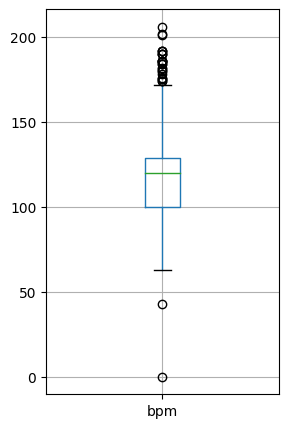

In [ ]:
songs_df.boxplot('bpm', figsize=(3, 5))

In [ ]:
bpm = songs_df['bpm']

Q1 = bpm.quantile(0.25)
Q3 = bpm.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound: {lower_bound}\nUpper bound: {upper_bound}")

bpm_outliers = songs_df.loc[(songs_df['bpm'] > upper_bound) | (songs_df['bpm'] < lower_bound)]
print(f"Number of outliers: {bpm_outliers.shape[0]}")

Lower bound: 56.5
Upper bound: 172.5
Number of outliers: 28


Considering the graph above, it is verified that there are 28 outliers detected, most of which are outside the `upper whisker`, whose value is `172.5`.

However, it can be seen that there is 1 song with 0 beats per minute, which is impossible. This means that that observation could possibly have missing data, whose default value is set to 0. This observation at 0 bpm will be checked to further investigate whether to drop the observation or not.

In [ ]:
songs_df[songs_df['bpm'] == 0]

,title,artist,top genre,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,year,year2
442,Million Years Ago,Adele,british soul,0,0,0,-60,0,0,227,0,0,0,2016,2016


Upon inspection, it can be inferred that there are errors in the encoding of the data of this song since other variables are also 0. This song can be dropped since it possibly has a lot of missing values and it is only one anyway.

In [ ]:
songs_df.drop(442, inplace = True)

Even without this song, there are still 27 outliers that are more extreme than the upper and lower bounds. Nevertheless, these outliers will be kept since it is possible to have songs with beats-per-minute more than `172.5` and there is no established bpm for music (Pro Musician Hub, n.d.). In short, they are considered real data.

The next variable to check is `dB`. Decibels measure how loud the song is. Similar to how `bpm` is cleaned, a boxplot will also be used to check whether there are existing outliers in `dB`.

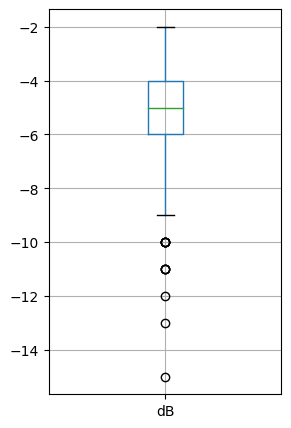

In [ ]:
songs_df.boxplot('dB', figsize=(3, 5))
plt.show()

In [ ]:
dB = songs_df['dB']

Q1 = dB.quantile(0.25)
Q3 = dB.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound: {lower_bound}\nUpper bound: {upper_bound}")

db_outliers = songs_df.loc[(songs_df['dB'] > upper_bound) | (songs_df['dB'] < lower_bound)]
print(f"Number of outliers: {db_outliers.shape[0]}")

Lower bound: -9.0
Upper bound: -1.0
Number of outliers: 13


Since the values are in negative numbers, 0 indicates the loudest song, which outputs the maximum volume of the song (Ashish, 2022). The lower the value, the softer it is. Based on the graph, it can be seen that there are 13 outliers, mainly the softer songs. In this case, they will also be kept as it is possible for a song to be soft and there is no standard decibel for a song. They are also not too extreme or far away from the lower whisker.

The next variable to check is `dur`. This indicates how long the song is. In checking whether there are any outliers in the data, a boxplot will be used again since it is easier to detect the outliers by just viewing the graph.

<Axes: >

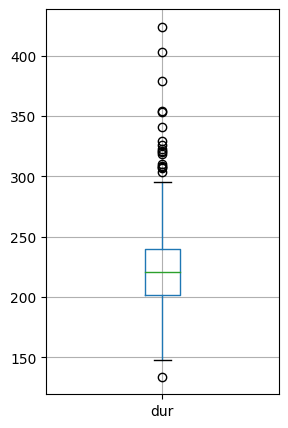

In [ ]:
songs_df.boxplot('dur', figsize=(3, 5))

In [ ]:
dur = songs_df['dur']

Q1 = dur.quantile(0.25)
Q3 = dur.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound: {lower_bound}\nUpper bound: {upper_bound}")

dur_outliers = songs_df.loc[(songs_df['dur'] > upper_bound) | (songs_df['dur'] < lower_bound)]
print(f"Number of outliers: {dur_outliers.shape[0]}")

Lower bound: 145.375
Upper bound: 296.375
Number of outliers: 18


By evaluation, it appears that the data contains outliers; however, these observations will be kept since the duration of a song varies and depends on how the artist sang the song. While it is uncommon for songs to be longer than 5 minutes, it is still possible; hence, the data will be considered.

The next variable to check is `nrgy`. The energy variable signifies how lively or energetic the song is. Since this variable measures its liveliness, it is safe to assume that it has its own range. To check its range, its minimum and maximum values will be obtained.

In [ ]:
songs_df['nrgy'].min(), songs_df['nrgy'].max()

(4, 98)

The energy variable seems to include numbers from 0-100. This could also be the case for `dnce`, `live`, `val`, `acous`, `spch`, and `pop`, considering that they are also measuring the song by its danceability, liveness, valence, acousticness, speechness, and popularity, respectively. Thus, their ranges will be checked for any values that may exceed this range.

In [ ]:
songs_df[['nrgy', 'dnce', 'live', 'val', 'acous', 'spch', 'pop']].agg(['min', 'max'])

,nrgy,dnce,live,val,acous,spch,pop
min,4,23,2,4,0,3,0
max,98,97,74,98,99,48,99


Upon inspection, for these variables, there are no values exceeding the range.

However, for the popularity, its minimum value is 0, which is relatively unlikely considering that each song in the dataset was at one point the most popular song on Spotify during their year. To verify the information, the observation(s) with that value will be inspected.

In [ ]:
songs_df[songs_df['pop'] == 0]

,title,artist,top genre,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,year,year2
54,Hello,Martin Solveig,big room,128,98,67,-3,10,45,191,1,3,0,2010,2010
139,Blow Me (One Last Kiss),P!nk,dance pop,114,92,60,-3,25,75,256,0,4,0,2012,2012
267,Not a Bad Thing,Justin Timberlake,dance pop,86,73,59,-6,38,46,266,27,6,0,2014,2014
367,L.A.LOVE (la la),Fergie,dance pop,202,39,48,-8,26,27,193,2,9,0,2015,2015


After assessing the data above, while the popularity of those songs is 0, they can be considered as real data in this case since it is possible that these songs were comparatively less popular when the data was collected than at the time of the songs' height. While the songs may have been popular at the past, a possible explanation for their currently low popularity rating is that a majority of the tracks' plays were during the time of their popularity, and the tracks are not as played recently.

Lastly, the dataset will be checked for the presence of null values.

In [ ]:
songs_df.isnull().any()

title        False
artist       False
top genre    False
bpm          False
nrgy         False
dnce         False
dB           False
live         False
val          False
dur          False
acous        False
spch         False
pop          False
year         False
year2        False
dtype: bool

Upon checking, there are no null values in the dataset. It could be possible that the default value for missing data is set to 0, though some data values in the dataset may be legitimately 0. With that in mind, only the variables `year`, `bpm`, and `dur` with 0 as a value will be considered a default value for missing data while the other variables with zero values will be considered valid.

#III. Exploratory Data Analysis

Now that the data is cleaned, it can be used for data analysis, which will be done in this section. To better understand the data, some questions will be presented to analyze certain notable features of the dataset.

Some variables of interest that can be explored are artists, genres, beats per minute, popularity and more.

For clarity, the stated exploratory data analysis questions are marked as such:

### **Question #n: \<Question Here\>**

##A. Artists and Popularity

In this section, the variables `artist` and `pop` will be used in order to check if there is a correlation between the variables, specifically if the frequency of an artist is connected with their popularity based on their top song(s).

To do so, the total number of artists will be checked first.

In [ ]:
songs_df['artist'].nunique()

184

Since there are 184 unique artists in the dataset, the frequency of the artists will also be checked.

In [ ]:
artist_counts = songs_df['artist'].value_counts().to_frame().reset_index()
artist_counts.columns = ['artist', 'total']
artist_counts

,artist,total
0,Katy Perry,17
1,Rihanna,15
2,Lady Gaga,14
3,Justin Bieber,14
4,Maroon 5,14
...,...,...
179,5 Seconds of Summer,1
180,Michael Jackson,1
181,Disclosure,1
182,Lorde,1


The top 5 artists that appear the most are `Katy Perry`, `Justin Bieber`, `Rihanna`, `Maroon 5`, and `Lady Gaga`.

In [ ]:
(artist_counts['total'] == 1).sum()

76

Additionally, 76 artists appear only once, which is more than 1/3 of the artists. To get more information about the frequency of the artists, the mean and median will be computed while the mode will be showed in a graph.

In [ ]:
agg_count = artist_counts['total'].agg({"mean", "median"})
agg_count

mean      3.184783
median    2.000000
Name: total, dtype: float64

The average top songs an artist can have is said to be `3.18` while the median that separates the upper half from the lower half of the frequency of the artists is `2.00`.

To view the frequency of artists, a histogram will be used since it is best to use it to identify the modes and to easily visualize the data being presented.

Text(0, 0.5, 'Number of Artists')

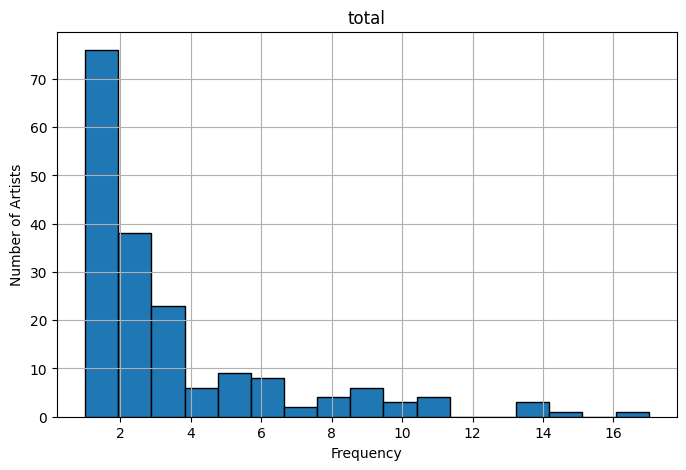

In [ ]:
artist_counts.hist(bins=17, figsize=(8, 5), edgecolor="black")
plt.xlabel('Frequency')
plt.ylabel('Number of Artists')

Based on the graph above, it can be seen that the shape of the distribution is positively skewed, where the mean is higher than the median and mode, and most of the artists only have a few songs on the top song list on Spotify.


Since the artists with at least 10 top songs appeared fewer times, only they will be shown in the bar graph along with the number of songs that topped the Spotify playlist.


A bar graph will be used to show the data since it is best to use it when representing the number of top songs the artist has. Using a bar graph, it is also easier to view which artist has the most-topped song.

Text(0.5, 1.0, 'Artists with at least 10 top songs')

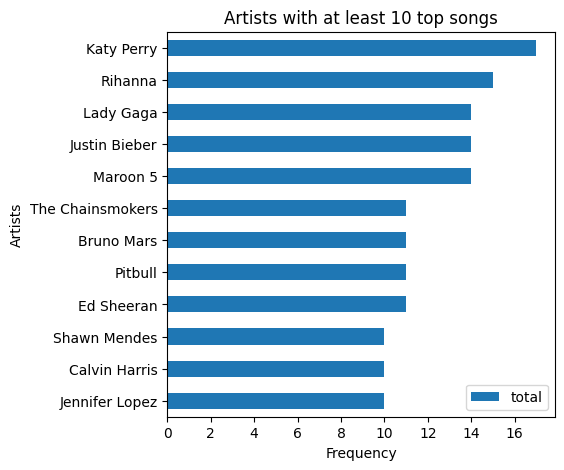

In [ ]:
artist_count10 = artist_counts[artist_counts["total"] >= 10]

artist_count10.plot.barh('artist', figsize=(5,5)).invert_yaxis()
plt.xlabel('Frequency')
plt.ylabel('Artists')
plt.title('Artists with at least 10 top songs')


Next to check is the average popularity of their song(s). This is to verify whether the frequency of the artists correlates with their current popularity.

Before determining the popularity of an artist, it is best to consider the distribution of the popularity in the overall data.


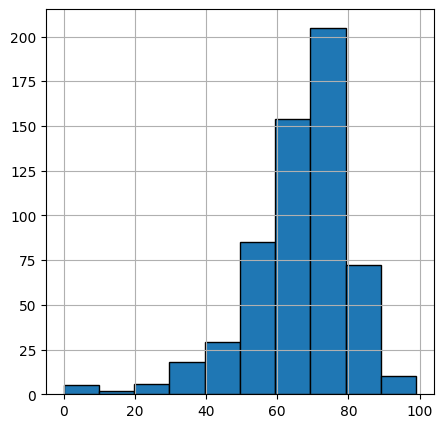

In [ ]:
songs_df['pop'].hist(figsize=(5,5), edgecolor="black")
plt.show()

Since the distribution of popularity is negatively skewed, the median of an artist's popularity based on their songs will be used instead of the mean, as it best represents the data without being affected by the tails of either the positively or negatively skewed distributions.

In [ ]:
artist_popularity = songs_df.groupby('artist')['pop'].median().reset_index().sort_values(by = 'pop', ascending = False)
artist_popularity

,artist,pop
97,Lewis Capaldi,96.0
150,SHAED,92.0
102,Lizzo,90.0
108,Mabel,86.0
115,Marshmello,86.0
...,...,...
78,Joey Montana,29.0
88,Kelly Rowland,28.0
73,Jennifer Hudson,18.0
128,Nelly Furtado,18.0


Similar to the frequency of artists, the mean and median will be computed to get more information about the popularity of the artists.

In [ ]:
agg_popularity = artist_popularity['pop'].agg({"mean", "median"})
agg_popularity

mean      66.125
median    69.000
Name: pop, dtype: float64

The average popularity of artists, with the consideration of the number of their top songs, is reported to be `66.13` while the median is `69.00`.

To view the shape of distribution of the popularity of artists, a histogram will be used as it best represents the numerical data.

array([[<Axes: title={'center': 'pop'}>]], dtype=object)

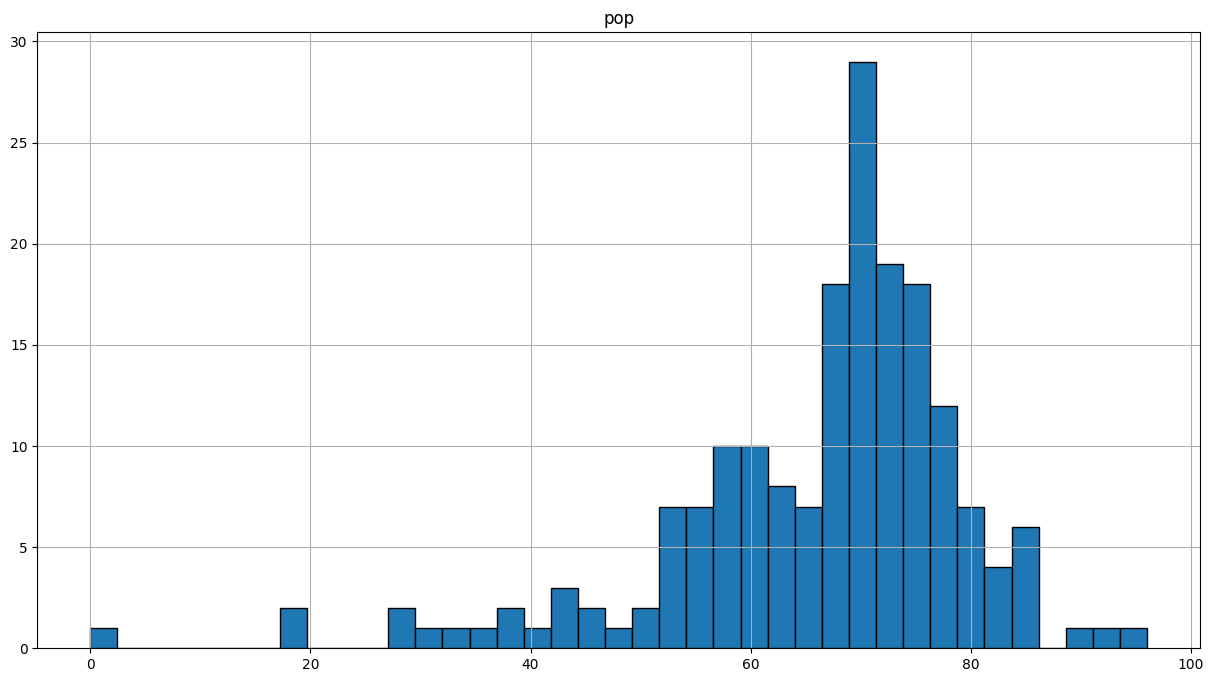

In [ ]:
artist_popularity.hist(bins=39, figsize=(15, 8), edgecolor="black")

It can be seen from the graph above that the shape of the distribution is negatively skewed, which is the opposite of the distribution of the frequency of the artists. It can also be observed that most artists fall in the range of 60 to 80.

Since there are too many artists to fit in a bar graph, only the 15 most popular artists will be displayed for viewing.

Text(0.5, 1.0, 'Popularity of artists')

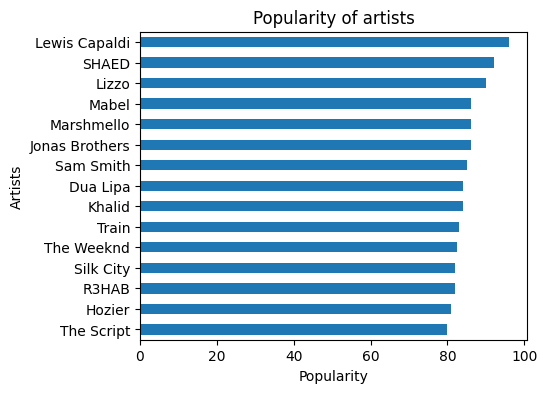

In [ ]:
artist_pop15 = artist_popularity.head(15)

artist_pop15.plot.barh('artist', figsize=(5,4), legend = False).invert_yaxis()
plt.xlabel('Popularity')
plt.ylabel('Artists')
plt.title('Popularity of artists')

When basing upon the average popularity of their songs, it can be said that currently the most popular artists of the decade are `Lewis Capaldi`, `SHAED`, `Lizzo`, `Mabel`, `Marshmello`, and `Jonas Brothers`.

It can be seen that none of the artists based on popularity are included in the artists that have the most-topped songs. With that being said, the frequency of the songs made by the most popular artists will be checked.


In [ ]:
pop_count = artist_counts[(artist_counts["artist"] == "Lewis Capaldi") |
                          (artist_counts["artist"] == "SHAED") |
                          (artist_counts["artist"] == "Lizzo") |
                          (artist_counts["artist"] == "Mabel") |
                          (artist_counts["artist"] == "Marshmello") |
                          (artist_counts["artist"] == "Jonas Brothers")]
pop_count

,artist,total
50,Jonas Brothers,3
72,Lizzo,2
100,Marshmello,2
125,Lewis Capaldi,1
126,SHAED,1
129,Mabel,1


Based on the given data above, the said popular artists have lower number of top songs in Spotify. With this, a question can be formed.

###**Question #1: Are the frequency and popularity of an artist correlated?**

This question can be answered by using a scatter plot, considering that the two variables are being dealt with, and it is a good way to get a visual of the relationship between the variables involved.

In [ ]:
freq_pop = artist_counts.merge(artist_popularity, on='artist').sort_values(by = 'pop', ascending = False)
freq_pop

,artist,total,pop
125,Lewis Capaldi,1,96.0
126,SHAED,1,92.0
72,Lizzo,2,90.0
100,Marshmello,2,86.0
129,Mabel,1,86.0
...,...,...,...
130,Joey Montana,1,29.0
149,Kelly Rowland,1,28.0
127,Nelly Furtado,1,18.0
161,Jennifer Hudson,1,18.0


Spearman's correlation will also be used, as it assesses the monotonic relationship between the two variables involved. This is a suitable method because neither variable is normally distributed and the popularity variable is ordinal.

In [ ]:
correlation, p_value = spearmanr(freq_pop['total'], freq_pop['pop'])
correlation

-0.0038411046779105347

Text(0.5, 1.0, 'Relationship of Frequency of Artists and Popularity')

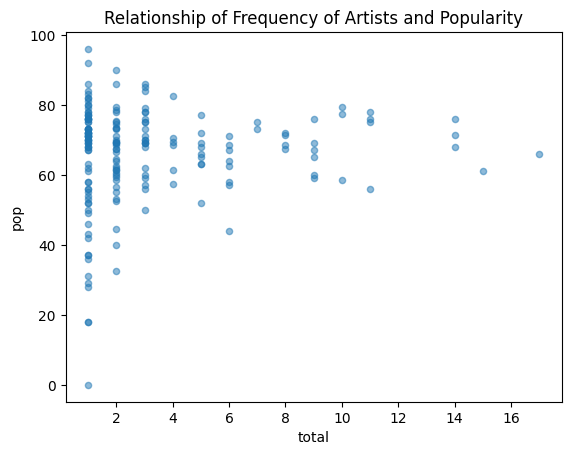

In [ ]:
freq_pop.plot.scatter(x='total', y='pop', alpha=0.5)
plt.title('Relationship of Frequency of Artists and Popularity')

According to the graph and data above, the frequency and popularity of the artists has very weak negative correlation, considering the Spearman's correlation coefficient, which is `-0.0038`, less than 0.

The correlation coefficient, by itself, cannot determine if the correlation is genuine or not. It is necessary to compare the observed correlation coefficient with the null hypothesis to test the significance of the correlation coefficient.

In this case, the hypotheses are as follows:

* Null hypothesis: There is no correlation between the frequency and popularity of an artist.

* Alternative hypothesis: There is a correlation between the frequency and popularity of an artist.

The p-value has already been determined while the Spearman rank correlation coefficient is being computed.

In [ ]:
p_value

0.9587291752817353

Since the p-value, whose value is `0.9587`, is greater than the standard significance level, which is `0.05`, the null hypothesis will be accepted. Thus, it can concluded that there is no correlation between the frequency and popularity of an artist.

##B. Genres

In this section, the variables `genre`, `pop`, and other variables will now be used to check if they are correlated to one another.

First, the total number of genres will be checked.

In [ ]:
songs_df['top genre'].nunique()

50

There are 50 unique genres of songs in the dataset. Next, the types of genres existing in the dataset will be viewed, along with the total number of top songs.

In [ ]:
genre_counts = songs_df['top genre'].value_counts().reset_index()
genre_counts.columns = ['top genre', 'total']
genre_counts

,top genre,total
0,dance pop,324
1,pop,56
2,canadian pop,31
3,boy band,15
4,barbadian pop,15
5,electropop,13
6,big room,10
7,neo mellow,9
8,british soul,9
9,art pop,8


The most frequently occuring genres (that appear more than 10 times) are `dance pop`, `pop`, `canadian pop`, `barbadian pop`, `boy band`, `electropop`, and `british soul`. `Dance pop` has an overwhelming number of appearances, appearing more than 5 times the next most common genre.



In [ ]:
(genre_counts['total'] == 1).sum()

15

15 genres appeared only once.

To get more information about the distribution of the recurrence of the top genres, the mean and median will be computed, while the mode will be shown in a graph since it is much easier to see its visualization.

In [ ]:
agg_genre = genre_counts['total'].agg({"mean", "median"})
agg_genre

mean      11.72
median     2.00
Name: total, dtype: float64

According to the data above, the average number of genres appearing in the top songs is `11.72`; however, this is heavily influenced by an outlier, `dance pop`, which has a value of `324`. The median, on the other hand, is observed to be `2.00`, which means that half of the genres appeared at most twice while the other half appeared at least twice.


For the frequency of genres, a histogram will be used, as it best represents the modality of the data to be analyzed.

array([[<Axes: title={'center': 'total'}>]], dtype=object)

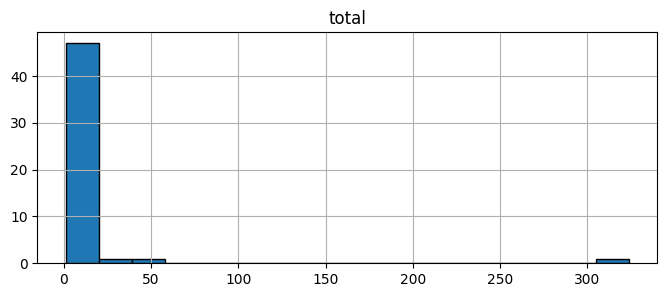

In [ ]:
genre_counts.hist(bins=17, figsize=(8, 3), edgecolor="black")

Since there is an outlier, which is the `dance pop`, it would be temporarily removed so that the other values could be seen and observed.

array([[<Axes: title={'center': 'total'}>]], dtype=object)

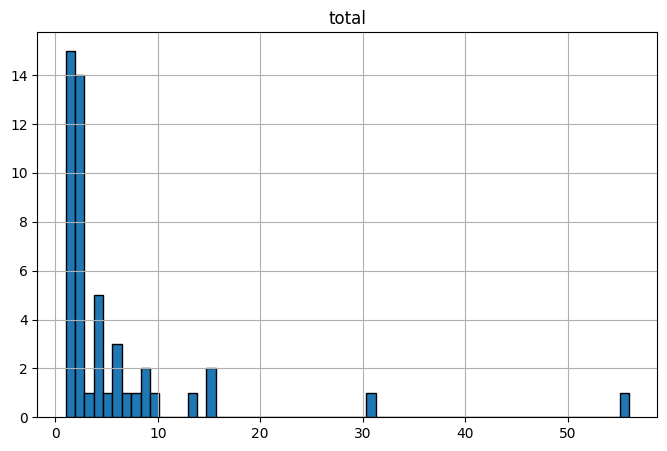

In [ ]:
genre_copy = genre_counts.copy()
genre_copy.drop(0, inplace = True)

genre_copy.hist(bins=60, figsize=(8, 5), edgecolor="black")

From here, it can be observed that the shape of the distribution is positively skewed, which means that most of the genres only appeared less than thrice.

Next to check is the popularity of the genres based on the songs related to them. Similarly to the popularity of an artist, the overall popularity of the data is negatively skewed, which means that the median would be best used because it is a more robust measure since it is less sensitive to extreme values.

In [ ]:
genre_popularity = songs_df.groupby('top genre')['pop'].median().reset_index()
genre_popularity.sort_values(by = 'pop', ascending = False)

,top genre,pop
34,escape room,90.0
14,brostep,86.0
2,alternative r&b,84.0
42,irish singer-songwriter,81.0
29,edm,80.5
26,danish pop,80.0
20,celtic rock,80.0
32,electronic trap,79.5
15,canadian contemporary r&b,79.0
11,big room,77.0


When looking at the average popularity of each genre, `escape room`, `brostep`, `alternative r&b`, `irish singer-songwriter`, and `edm` are the most successful.

For more information about the distribution, the mean and median will be computed then graphed using a histogram.

In [ ]:
agg_pop = genre_popularity['pop'].agg({"mean", "median"})
agg_pop

mean      67.11
median    70.50
Name: pop, dtype: float64

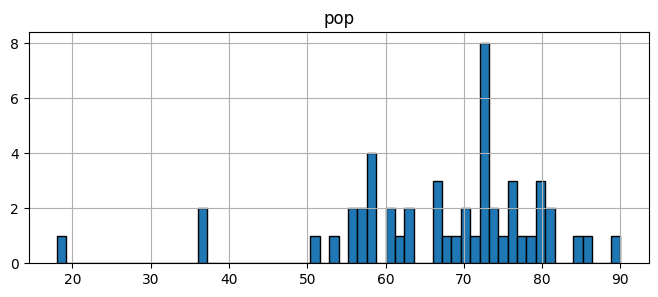

In [ ]:
genre_popularity.hist(bins=60, figsize=(8, 3), edgecolor="black")
plt.show()

The average popularity of the genres is `67.11` while the median is reported to be `70.50`. Based on the graph, it can be detected that the shape of the distribution is negatively skewed, considering that the median is greater than the mean. It can also be noticed that most of the data is in the range of 70 to 80.

Considering the most popular genres, their frequency will be checked since none of them appeared in the most frequent genre to appear in Spotify's top songs.

In [ ]:
pop_count = genre_counts[(genre_counts["top genre"] == "escape room") |
                         (genre_counts["top genre"] == "brostep") |
                         (genre_counts["top genre"] == "alternative r&b") |
                         (genre_counts["top genre"] == "irish singer-songwriter") |
                         (genre_counts["top genre"] == "edm")]
pop_count

,top genre,total
17,edm,4
23,brostep,2
26,escape room,2
46,irish singer-songwriter,1
49,alternative r&b,1


Similar to the set-up in the frequency vs popularity in the first section, the same question could also be asked here since the frequency of the most popular genres is less than 3.

###**Question #2: Are the frequency and popularity of a genre correlated?**

The question above can be answered using Spearman's correlation and a scatterplot to visualize the variables being tested.

In [ ]:
freq_pop = genre_counts.merge(genre_popularity, on='top genre').sort_values(by = 'pop', ascending = False)
freq_pop

,top genre,total,pop
26,escape room,2,90.0
23,brostep,2,86.0
49,alternative r&b,1,84.0
46,irish singer-songwriter,1,81.0
17,edm,4,80.5
43,danish pop,1,80.0
35,celtic rock,1,80.0
21,electronic trap,2,79.5
10,canadian contemporary r&b,7,79.0
6,big room,10,77.0


In [ ]:
correlation, p_value = spearmanr(freq_pop['total'], freq_pop['pop'])
correlation

-0.027980162821876833

Text(0.5, 1.0, 'Relationship of Frequency and Popularity of Genres')

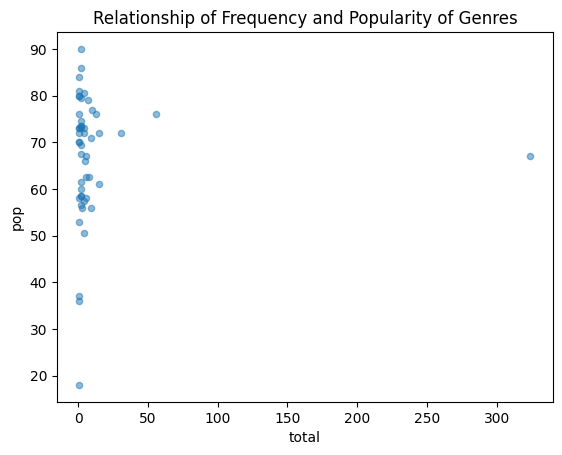

In [ ]:
freq_pop.plot.scatter(x='total', y='pop', alpha=0.5)
plt.title('Relationship of Frequency and Popularity of Genres')

Based on the graph and the data constructed, the two variables have a weak negative correlation, as Spearman's correlation coefficient shows a value of `-0.0280`, which is almost 0.

To test its significance, a null hypothesis will be constructed, which states that there is no correlation between the variables. The p-value will be computed that will be based on the t-distribution to determine if the correlation coefficient is significant.

In [ ]:
p_value

0.847050496441687

It can be conluded that the frequency and the popularity of the genres are not significantly correlated since the p-value (`0.8471`) is greater than the significance level (`0.05`).

One interesting feature of the dataset is that dance pop is by far the most represented genre in the dataset, representing over half of the dataset by itself. Since a majority of the top songs on Spotify in the years 2010-2019 are of this genre, we can put a particular focus on this genre for further data analysis.

In [ ]:
songs_df['top genre'].value_counts().nlargest(10)

dance pop        324
pop               56
canadian pop      31
boy band          15
barbadian pop     15
electropop        13
big room          10
neo mellow         9
british soul       9
art pop            8
Name: top genre, dtype: int64

It is reasonable to assume that in the dataset, some of the statistics may be correlated with each other. For example, a higher volume for songs may on average correlate with danceability, or danceability being inversely correlated with likelihood that the song is acoustic. To test this assumption, it is possible to construct a correlation matrix using the Pearson correlation coefficient to determine roughly how correlated the different song statistics are with each other. We construct a correlation matrix for both dance pop songs and non-dance pop songs.

###**Question #3: How are the computed song statistics correlated with each other for dance pop and non-dance pop songs?**

In [ ]:
dance_pop_songs = songs_df.loc[songs_df['top genre'] == 'dance pop']
other_songs = songs_df.loc[songs_df['top genre'] != 'dance pop']

To begin, the statistics for dance pop songs are computed.

In [ ]:
dance_pop_corr = dance_pop_songs[['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop']].corr()
dance_pop_corr

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
bpm,1.000000,0.146043,-0.177879,-0.037516,0.071306,0.000463,0.060686,-0.172955,0.068795,-0.013580
nrgy,0.146043,1.000000,0.132381,0.583103,0.143139,0.415247,-0.174778,-0.390432,0.089532,-0.059199
dnce,-0.177879,0.132381,1.000000,0.142945,-0.005884,0.484662,-0.165765,-0.273803,-0.056854,0.009034
dB,-0.037516,0.583103,0.142945,1.000000,0.014943,0.316143,-0.181317,-0.172634,-0.104887,0.012626
live,0.071306,0.143139,-0.005884,0.014943,1.000000,-0.004909,0.128593,-0.064100,0.136135,-0.095034
val,0.000463,0.415247,0.484662,0.316143,-0.004909,1.000000,-0.233727,-0.283468,0.146585,-0.029985
dur,0.060686,-0.174778,-0.165765,-0.181317,0.128593,-0.233727,1.000000,0.034136,0.024353,-0.043051
acous,-0.172955,-0.390432,-0.273803,-0.172634,-0.064100,-0.283468,0.034136,1.000000,0.102562,-0.031417
spch,0.068795,0.089532,-0.056854,-0.104887,0.136135,0.146585,0.024353,0.102562,1.000000,-0.090065
pop,-0.013580,-0.059199,0.009034,0.012626,-0.095034,-0.029985,-0.043051,-0.031417,-0.090065,1.000000


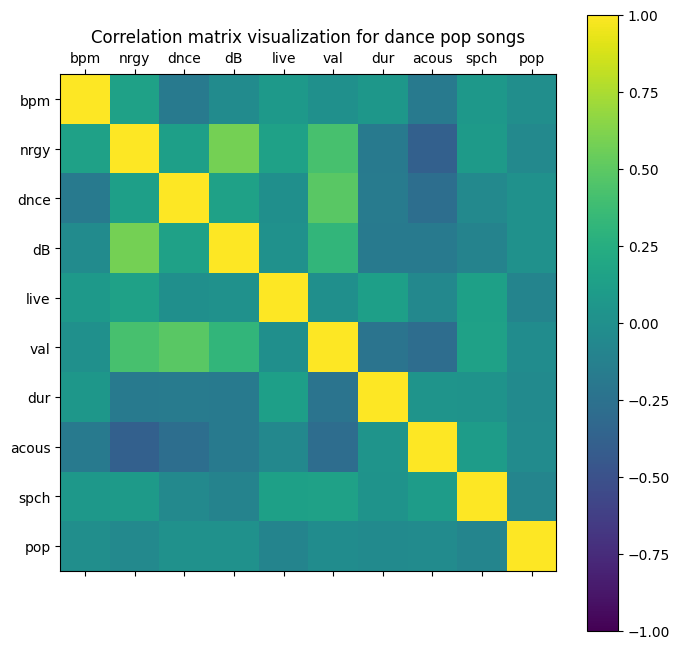

In [ ]:
_, ax = plt.subplots(figsize=(8, 8))
im = ax.matshow(dance_pop_corr, vmin=-1.0, vmax=1.0)
plt.title('Correlation matrix visualization for dance pop songs')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], ['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop'])
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], ['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop'])
plt.colorbar(im, ax=ax)
plt.show()

The graph above shows a graphical visualization of the correlation matrix for dance pop songs. Tiles closer to yellow have a stronger positive correlation, while tiles closer to purple have a stronger negative correlation. Tiles closer to blue have weak or no correlation.

As seen in the graph, barring the perfect correlation of a value with itself, there are some notable green (moderately positively correlated) and indigo (moderately negatively correlated) tiles present.

Some scatterplots are provided of some of these notable values within the correlation matrix to help visualize these correlations in the dataset.

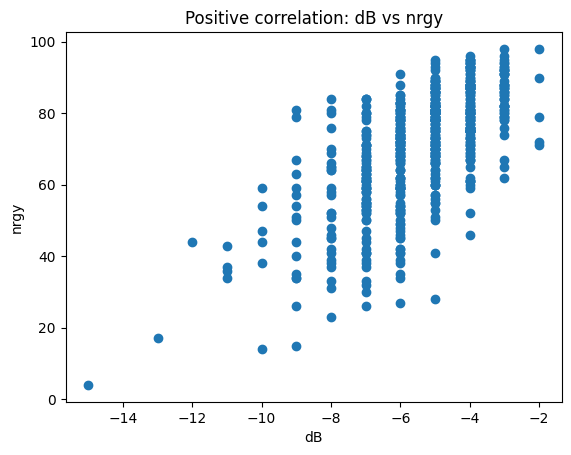

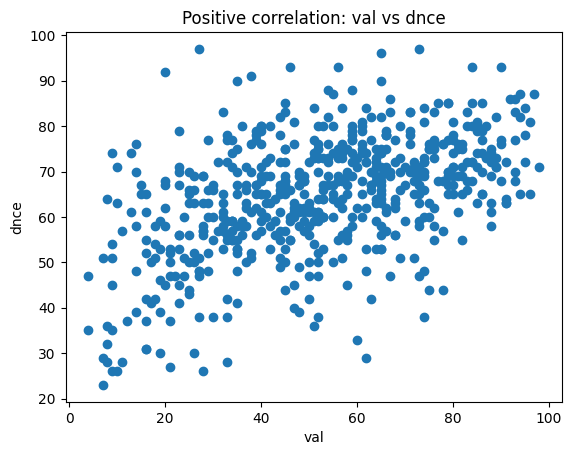

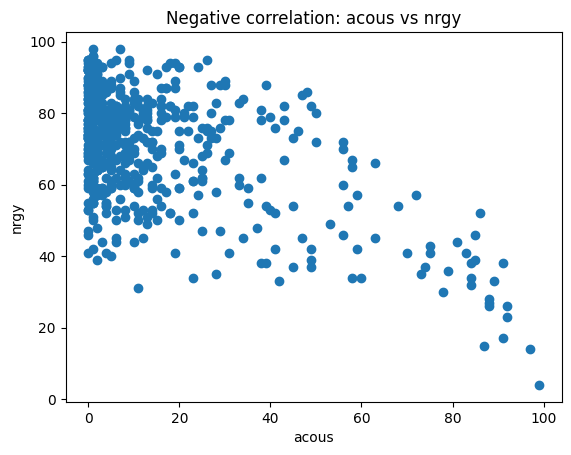

In [ ]:
# Positive Correlation: loudness and energy, valence and danceability
plt.scatter(songs_df['dB'].to_numpy(), songs_df['nrgy'])
plt.title("Positive correlation: dB vs nrgy")
plt.xlabel("dB")
plt.ylabel('nrgy')
plt.show()

plt.scatter(songs_df['val'].to_numpy(), songs_df['dnce'])
plt.title("Positive correlation: val vs dnce")
plt.xlabel("val")
plt.ylabel('dnce')
plt.show()

# Negative correlation: likelihood of being acoustic and energy
plt.scatter(songs_df['acous'].to_numpy(), songs_df['nrgy'])
plt.title("Negative correlation: acous vs nrgy")
plt.xlabel("acous")
plt.ylabel('nrgy')
plt.show()

A positive correlation can be seen in the first two graphs, with the dots on the scatterplot trending upwards as the dots are closer and closer to the right. On the third graph, the opposite occurs: a negative correlation is seen based on the dots trending downwards the closer to the right they are.

Notably, in the third graph of `acous` versus `nrgy`, a majority of the songs are clumped at the top left of the dataset, though there is still a group of songs at the bottom right of the graph with high `acous` and low `nrgy`.

However, most pairs of statistics only show weak correlation either way.

The statistics for non-dance pop songs are highlighted below.

In [ ]:
other_corr = other_songs[['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop']].corr()
other_corr

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop
bpm,1.000000,0.070636,-0.189706,0.117872,0.080355,0.008399,-0.110431,-0.111663,0.085446,-0.037157
nrgy,0.070636,1.000000,0.132069,0.714418,0.211538,0.389686,-0.123089,-0.665358,0.130936,-0.067807
dnce,-0.189706,0.132069,1.000000,0.104890,-0.078221,0.483925,-0.195194,-0.227774,-0.013864,0.213206
dB,0.117872,0.714418,0.104890,1.000000,0.089684,0.377606,-0.174346,-0.414864,-0.017536,0.093836
live,0.080355,0.211538,-0.078221,0.089684,1.000000,0.045576,0.057299,-0.123206,0.119821,-0.041767
val,0.008399,0.389686,0.483925,0.377606,0.045576,1.000000,-0.307309,-0.221786,0.065093,0.144906
dur,-0.110431,-0.123089,-0.195194,-0.174346,0.057299,-0.307309,1.000000,0.125899,0.050266,-0.172443
acous,-0.111663,-0.665358,-0.227774,-0.414864,-0.123206,-0.221786,0.125899,1.000000,-0.103536,-0.005444
spch,0.085446,0.130936,-0.013864,-0.017536,0.119821,0.065093,0.050266,-0.103536,1.000000,0.049586
pop,-0.037157,-0.067807,0.213206,0.093836,-0.041767,0.144906,-0.172443,-0.005444,0.049586,1.000000


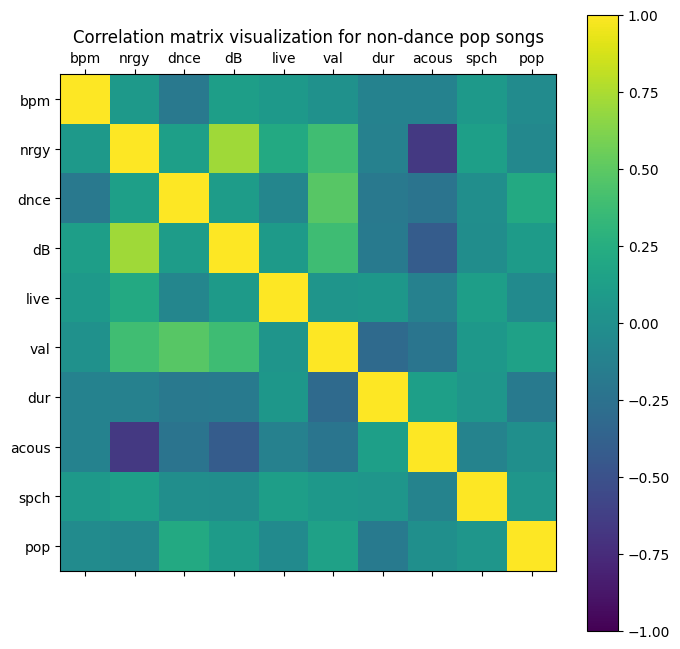

In [ ]:
_, ax = plt.subplots(figsize=(8, 8))
im = ax.matshow(other_corr, vmin=-1.0, vmax=1.0)
plt.title('Correlation matrix visualization for non-dance pop songs')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], ['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop'])
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], ['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch', 'pop'])
plt.colorbar(im, ax=ax)
plt.show()

Like the correlation matrix for the dance pop songs, this correlation matrix does seem to have some tiles that have moderate positive and negative correlations. However, the two visualizations look very similar when compared to each other, leading us to hypothesize that:

Generally speaking, there does not seem to be a significant difference between the correlations for dance pop and non-dance pop songs.

This is shown below by using a t-test for paired data. We assume a standard 95% confidence level for this test.

In [ ]:
diff_corr = dance_pop_corr - other_corr
ttest_1samp(diff_corr.to_numpy().flatten(), 0).pvalue

0.7376556458886421

Since the p-value calculated by the t-test was larger than the 0.05 threshold, we can conclude that there is no significant difference between the two correlation matrices at a 95% confidence level.

While the correlations between the dance pop and non-dance pop songs are most likely about the same, a natural follow-up question would be to compare certain statistics between dance pop songs and non-dance pop songs.

We can begin with danceability, as dance pop songs, by their name, are intended to be danced to.

###**Question #4: Is there a significant difference in danceability between dance pop songs and other songs?**

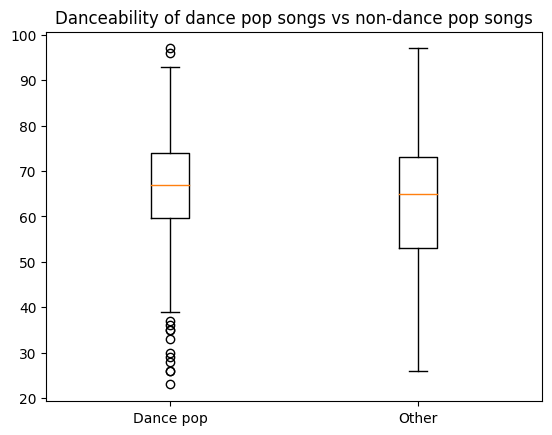

In [ ]:
plt.boxplot([dance_pop_songs.dnce.to_numpy(), other_songs.dnce.to_numpy()])
plt.title("Danceability of dance pop songs vs non-dance pop songs")
plt.xticks([1, 2], ['Dance pop', 'Other'])
plt.show()

There seems to be a difference in the danceability of dance pop songs compared to songs outside the genre, as more of the 'box' in the boxplot is higher up for the dance pop boxplot compared to the plot for other songs. However, how significant is this difference at a 95% confidence level?

In [ ]:
ttest_ind(dance_pop_songs.dnce, other_songs.dnce).pvalue

0.006562442625965808

As the p-value is below the 0.05 threshold, there is enough evidence to conclude that there is a significant difference between the danceability of dance pop and other songs, using a 5% significance value.


The fact that dance pop is the most represented genre in the dataset seems to imply that this genre of songs are generally more popular than other genres of songs at their peak. However, does this imply that dance pop songs on average also remained comparatively more popular than other genres even after losing the top 1 spot?

###**Question #5: Is there a significant difference between the current popularity of previously top 1 dance pop songs and songs outside this genre?**
---



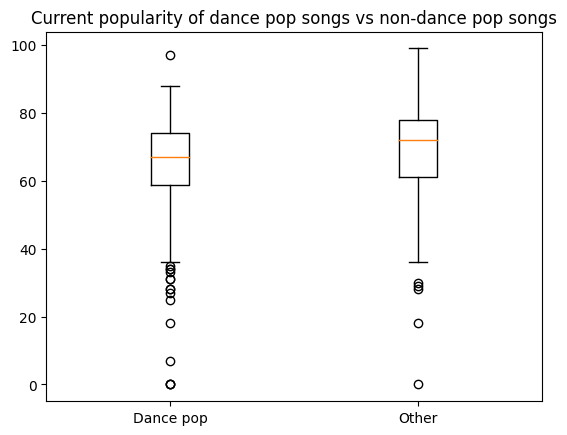

In [ ]:
plt.boxplot([dance_pop_songs['pop'].to_numpy(), other_songs['pop'].to_numpy()])
plt.title("Current popularity of dance pop songs vs non-dance pop songs")
plt.xticks([1, 2], ['Dance pop', 'Other'])
plt.show()

Like the previous boxplot, it seems like there is a difference between the current popularity of dance pop songs and other songs. Is this difference significant?

In [ ]:
ttest_ind(dance_pop_songs['pop'], other_songs['pop']).pvalue

5.391112480157386e-05

With a confidence level of 95%, there is enough evidence to conclude that there is a significant difference between the current popularity of dance pop songs and other songs.

##C. BPM

Beats per minute are typically used to measure the overall tempo of a song. It aids musicians or songwriters in creating their pieces, considering how the speed affects how they want to express their songs to the public. In this section, the variables `bpm` and `pop`, as well as the popularity of a genre, will be used to determine whether there is a correlation between the average `bpm` and the popularity of genres.


Beats per minute are usually grouped together in range to categorize which genre they belong to. To start, the frequency of the ranges of `bpm`, specifically in 10 intervals starting from 40 to 49, will be determined and graphed to easily envision the distribution of bpm.


In [ ]:
bpm_df = songs_df[['bpm', 'pop']].copy()
bins = [40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210]
bpm_df['category'] = pd.cut(bpm_df['bpm'], bins=bins, labels=['40-49', '50-59', '60-69', '70-79', '80-89', '90-99', '100-109', '110-119', '120-129', '130-139', '140-149', '150-159', '160-169', '170-179', '180-189', '190-199', '200-209'])

bpm_counts = bpm_df['category'].value_counts().reset_index()
bpm_counts.rename(columns={'category': 'total', 'index': 'category'}, inplace=True)
bpm_counts

,category,total
0,120-129,157
1,90-99,99
2,110-119,90
3,100-109,70
4,130-139,38
5,80-89,35
6,140-149,26
7,70-79,17
8,150-159,17
9,180-189,12


The most common bpms seem to lie around the middle of the dataset, between:

`120-129`

`90-99`

`110-119`

`100-109`

`130-139`

The bpms that lie in the extremes, like `190-199`, `200-209`, `60-69`, `40-49`, and `50-59`, are the least frequent.

For additional details about the data, the mean, median and mode will be computed to check the center of the data and to see the shape of the distribution. In showing the visualization of the data, a histogram will be used.

In [ ]:
agg_bpm = bpm_df['bpm'].agg({"mean", "median"})
agg_bpm

mean      118.861775
median    120.000000
Name: bpm, dtype: float64

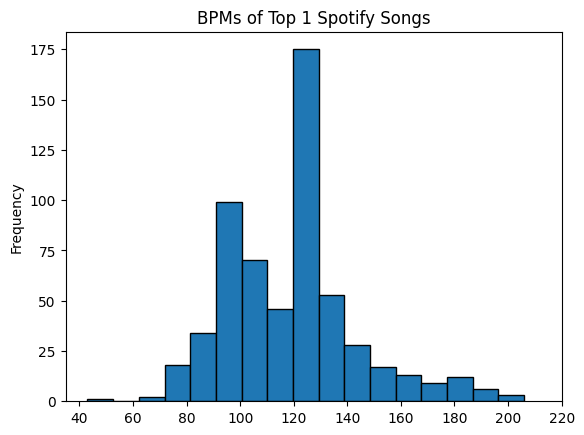

In [ ]:
songs_df['bpm'].plot.hist(bins=17, edgecolor="black")
plt.xticks([40, 60, 80, 100, 120, 140, 160, 180, 200, 220])
plt.title('BPMs of Top 1 Spotify Songs')
plt.show()

According to the computation, the mean is said to be `118.86`, while the median is `120.00`, which means that this is the middle of the dataset. It can be seen in the graph that there are two peaks, one in `90-99` and one in `120-129`. This can be considered as a skewed bimodal distribution

Next to check is the average popularity of the ranged `bpm`. This is done to establish, just like in the previous sections, whether the popularity correlates with the frequency of the `bpm` range. The median is once again used to measure the popularity of a `bpm` range.

In [ ]:
bpm_popularity = bpm_df.groupby('category')['pop'].median().reset_index()
bpm_popularity.sort_values(by = 'pop', ascending = False)

,category,pop
13,170-179,76.0
11,150-159,73.0
5,90-99,72.0
4,80-89,70.0
6,100-109,70.0
7,110-119,69.0
2,60-69,68.5
10,140-149,68.5
14,180-189,68.5
15,190-199,68.0


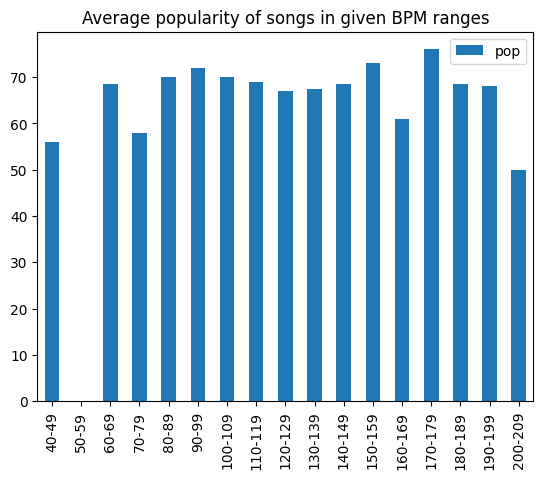

In [ ]:
bpm_popularity.plot.bar()
plt.xticks(range(17), bpm_popularity['category'].to_numpy())
plt.title('Average popularity of songs in given BPM ranges')
plt.show()

As seen above, the currently most popular songs from this decade have BPMs of:

`170-179`

`150-159`

`90-99`

`60-69`

`130-139`

The range 50 to 59 shows no popularity since there are no songs that fall within this range.

In [ ]:
agg_pop = bpm_popularity['pop'].agg({"mean", "median"})
agg_pop

mean      66.4375
median    68.5000
Name: pop, dtype: float64

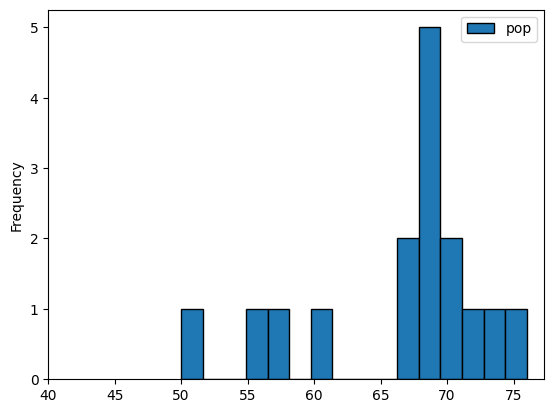

In [ ]:
bpm_popularity.plot.hist(bins=16, edgecolor="black")
plt.xticks([40, 45, 50, 55, 60, 65, 70, 75])
plt.show()

Based on the the computation of the mean and median, which are `66.4375` and `68.5000`, respectively, it can be determined that the shape of this distribution is negatively skewed, considering that the mean is less than the median, which is less than the mode.    

On average, the popularity of a given range of BPMs is roughly around the 67.5-72.5 range, with some outliers with a lower average popularity.

Given this information, a question can be formulated similar to the previous analyses.

###**Question #6: Is the average BPM of a genre correlated with its popularity?**

We want see a summary of the strength between the variables and whether they are correlated. To achieve this, a scatterplot and the Spearman correlation coefficient will be computed to produce the result of the inquiry. But first, index 16 of the frequency of the bpm and index 1 of the popularity of the bpm will be dropped since no song falls within the range `50-59`.

In [ ]:
bpm_counts.drop(16, inplace=True)
bpm_popularity.drop(1, inplace=True)

In [ ]:
bpm_counts.columns = ['category', 'total']
freq_pop = bpm_counts.merge(bpm_popularity, on='category').sort_values(by = 'pop', ascending = False)
freq_pop

,category,total,pop
10,170-179,9,76.0
8,150-159,17,73.0
1,90-99,99,72.0
3,100-109,70,70.0
5,80-89,35,70.0
2,110-119,90,69.0
6,140-149,26,68.5
9,180-189,12,68.5
14,60-69,2,68.5
12,190-199,3,68.0


In [ ]:
correlation, p_value = spearmanr(freq_pop['total'], freq_pop['pop'])
correlation

0.3843320608040271

Text(0.5, 1.0, 'Relationship of Frequency and Popularity of BPM')

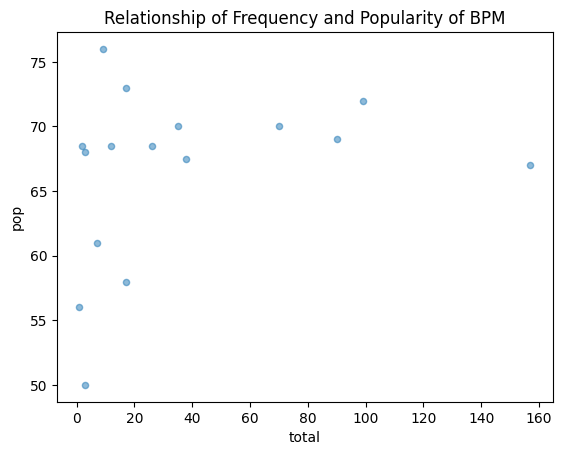

In [ ]:
freq_pop.plot.scatter(x='total', y='pop', alpha=0.5)
plt.title('Relationship of Frequency and Popularity of BPM')

The average bpm of a genre is weak positively correlated with its popularity because of the Spearman correlation coefficient, whose value is `0.3843`, which is greater than 0 though less than 0.5.

To check its overall significance, the p-value will be computed based on the t-distribution and the null hypothesis will be stated as "There is no correlation between the two variables".


In [ ]:
p_value

0.141622740976799

At 5% significance level, there is evidence to say that there is no correlation between the frequency and popularity of beats per minute since the p-value is greater than the significance level.

From here, another question can be formed that involves genres.

###**Question #7: Is there a correlation between the popularity of a music genre and its average `bpm`?**

To respond to the question, the average `bpm` of each genre will be collected first without ranging the `bpm` to get a more precise answer. We use the mean as the measure of central tendency in this case, as the `bpm`s of the songs in the dataset are roughly normally distributed.

In [ ]:
bpm_genre = songs_df.groupby(['top genre'])['bpm'].mean().reset_index()
bpm_genre.sort_values(by = 'bpm', ascending = False)

,top genre,bpm
0,acoustic pop,155.000000
7,australian pop,153.800000
41,indie pop,151.500000
9,baroque pop,146.000000
43,latin,140.750000
47,permanent wave,137.250000
2,alternative r&b,136.000000
28,downtempo,133.500000
1,alaska indie,132.000000
15,canadian contemporary r&b,130.000000


It is transparent that the top 5 genres with the highest `bpm` are `acoustic pop`, `australian pop`, `indie pop`, `baroque pop`, and `latin`.

Bringing back the previous most popular genre based on their popularity rate, their top 5 are `escape room`, `brostep`, `alternative r&b`, `irish singer-songwriter`, and `danish pop`.

They are completely different from one another, which is why the question was meant to see if they are correlated or not.

A scatterplot and Spearman correlation coefficient will be used in this case to verify whether the variables are correlated or not.

In [ ]:
pop_ave = bpm_genre.merge(genre_popularity, on='top genre').sort_values(by = 'pop', ascending = False)
pop_ave

,top genre,bpm,pop
34,escape room,127.000000,90.0
14,brostep,121.000000,86.0
2,alternative r&b,136.000000,84.0
42,irish singer-songwriter,129.000000,81.0
29,edm,103.000000,80.5
26,danish pop,120.000000,80.0
20,celtic rock,85.000000,80.0
32,electronic trap,98.000000,79.5
15,canadian contemporary r&b,130.000000,79.0
11,big room,122.300000,77.0


In [ ]:
correlation, p_value = spearmanr(pop_ave['bpm'], pop_ave['pop'])
correlation

-0.00985245573146597

Text(0.5, 1.0, 'Relationship of Average BPM and Popularity of Genres')

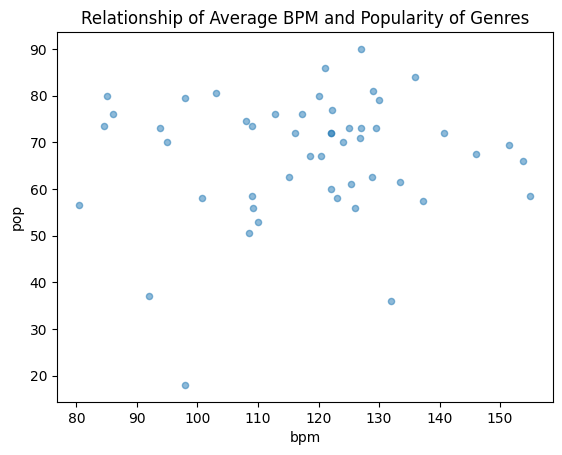

In [ ]:
pop_ave.plot.scatter(x='bpm', y='pop', alpha=0.5)
plt.title('Relationship of Average BPM and Popularity of Genres')

It can be observed that the graph almost shows no correlation between the variables since the Spearman correlation coefficient's value, which is `-0.0099`, is almost 0. It can be seen that there is a very weak negative correlation between the two.

To determine the significance of the correlation coefficient, the p-value will be computed, which will be used to check if the null hypothesis, which states that there is no correlation between the variables, should be accepted or rejected.

In [ ]:
p_value

0.9458597488684926

Based on the results, it can be concluded that the average `bpm` of a genre is not correlated with its popularity, considering that the p-value (`0.9459`) is greater than the significance level, which is `0.05`.

#IV. Research Question

<!-- After familiarizing themselves with the data, the researchers have decided on the following research question to explore: -->

The results of the exploratory data analysis seem to suggest that even within genres, the traditional means of classification for music, there is significant variation among the various computed features of top songs within those genres. Nowhere is this effect more prevalent than in the dance pop genre, the most represented genre in the dataset, as seen in Part A of the EDA. Additionally, there exist some correlations and trends between the different computed statistics of songs, both in dance pop music and in tracks outside that genre, seen in the EDA part C. However, aside from some notable cases highlighted in that section, these correlations are weak, and the variables themselves close to independent.

As a result, it may be possible to gather valuable insights from breaking down the topping dance pop titles into smaller subgenres. There is an information gap in the dataset, as many tracks in the dataset are classified merely as "dance pop" while having a large variance between the largely independent computed characteristics among the songs in that genre. The genre of a song, while also affected by external factors such as cultural context, is in no small part determined by the various musical qualities present in the song (Aucouturier, 2003). As seen in the results of part D of the EDA, there can exist significant relationships between a song's genre and its computed characteristics. As a result of the EDA, the aim is  to find answers to the following specific research question:

### **How can dance pop songs be further subclassified based on their tempo, energy, danceability, loudness, liveness, valence, duration, acousticness, and speechiness?**

As a classification problem, a clustering technique is proposed for this problem. The K-means clustering algorithm is proposed, adjusting the value of `k` based on the average distance to the centroids of each cluster. This technique is also preferred for its ability to cluster data with more than 2 dimensions.

As genres are the primary means for classifying songs, it is important to obtain more specific information about the most represented genre of music in the era. In particular, this information could be useful for future music producers. Information about the characteristics and trends of the most popular music in the previous decade would help them make more informed choices about the music they make, which could progress the artform forward and grow the global music industry.

The information gained from this proposed case study could also assist guiding recommender systems which use genres, computed track statistics, and other similar metrics. Music recommender systems are an integral part of most music and video streaming applications nowadays like Spotify and YouTube since they increase retention while reducing information overload (Schedl et al., 2017). With the continuous growth of the music industry worldwide, efficient information processing of music tracks has become a cornerstone of the industry (Li et al., 2005). As a result, there is significant value to pursuing to greater depth the properties of the dance pop genre as a whole.

# V. Data Modelling

There is a need to further preprocess some of the fields in the dataset before beginning the clustering algorithm. K-means clustering can only accurately model groups in the dataset if the scales of the values being analyzed are about the same, as otherwise some variables may overpower others.

Currently, while most of the songs' attributes are on a fixed range from 0 to 100, the tempo, loudness, and duration values fall outside this range. As a result, there is a need for the variables to be standardized first.

To begin, let us visualize these variables once again to see roughly how they are distributed. First, we create a `DataFrame` containing only the Dance Pop songs from the original dataset. This is the dataset that will be submitted to the clustering algorithm.

In [ ]:
dance_pop_df = songs_df[songs_df['top genre'] == 'dance pop']
dance_pop_df

,title,artist,top genre,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,year,year2
2,TiK ToK,Kesha,dance pop,120,84,76,-3,29,71,200,10,14,80,2010,2010
3,Bad Romance,Lady Gaga,dance pop,119,92,70,-4,8,71,295,0,4,79,2010,2010
7,Dynamite,Taio Cruz,dance pop,120,78,75,-4,4,82,203,0,9,77,2010,2010
8,Secrets,OneRepublic,dance pop,148,76,52,-6,12,38,225,7,4,77,2010,2010
11,Club Can't Handle Me (feat. David Guetta),Flo Rida,dance pop,128,87,62,-4,6,47,235,3,3,73,2010,2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
588,Giant (with Rag'n'Bone Man),Calvin Harris,dance pop,122,89,81,-4,8,61,229,2,4,84,2019,2019
593,No Guidance (feat. Drake),Chris Brown,dance pop,93,45,70,-7,16,14,261,12,15,81,2019,2019
597,Find U Again (feat. Camila Cabello),Mark Ronson,dance pop,104,66,61,-7,20,16,176,1,3,75,2019,2019
599,"No Brainer (feat. Justin Bieber, Chance the Ra...",DJ Khaled,dance pop,136,76,53,-5,9,65,260,7,34,70,2019,2019


Now that we have a dataset with all the dance pop songs, we now need to begin modifying the data to all be on the same scale. Generally speaking, it is more appropriate to apply standardization techniques rather than normalization when the data contains different ranges. As a result, we can standardize using the Z-score, transforming the data into roughly normal distributions with a mean of 0 and a standard deviation of 1. In this step, we also cut out the title, artist, top genre, and years of the song since those features are not relevant to the clustering procedure proposed, leaving only the songs' index and the features to cluster on.

In [ ]:
tracked_features = ['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch']
normalized_df = dance_pop_df.copy()[tracked_features]
normalized_df

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
2,120,84,76,-3,29,71,200,10,14
3,119,92,70,-4,8,71,295,0,4
7,120,78,75,-4,4,82,203,0,9
8,148,76,52,-6,12,38,225,7,4
11,128,87,62,-4,6,47,235,3,3
...,...,...,...,...,...,...,...,...,...
588,122,89,81,-4,8,61,229,2,4
593,93,45,70,-7,16,14,261,12,15
597,104,66,61,-7,20,16,176,1,3
599,136,76,53,-5,9,65,260,7,34


We can now standardize the dataset.

In [ ]:
for column_name in tracked_features:
  normalized_df[column_name] = zscore(normalized_df[column_name])

normalized_df

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
2,0.065517,0.794938,0.826418,1.582109,0.751496,0.735739,-0.758102,-0.054475,0.642996
3,0.020921,1.362094,0.334816,0.869169,-0.807876,0.735739,2.164541,-0.705759,-0.615800
7,0.065517,0.369571,0.744484,0.869169,-1.104899,1.229556,-0.665808,-0.705759,0.013598
8,1.314187,0.227782,-1.139992,-0.556709,-0.510853,-0.745715,0.011015,-0.249860,-0.615800
11,0.422280,1.007622,-0.320654,0.869169,-0.956387,-0.341682,0.318661,-0.510373,-0.741680
...,...,...,...,...,...,...,...,...,...
588,0.154707,1.149411,1.236087,0.869169,-0.807876,0.286813,0.134073,-0.575502,-0.615800
593,-1.138558,-1.969949,0.334816,-1.269648,-0.213829,-1.823135,1.118543,0.075782,0.768876
597,-0.648009,-0.481164,-0.402588,-1.269648,0.083194,-1.733350,-1.496454,-0.640630,-0.741680
599,0.779042,0.227782,-1.058058,0.156230,-0.733620,0.466383,1.087778,-0.249860,3.160588


Now, we can attempt to cluster the dataset with k-means clustering. Since we need to determine an optimal value of `k` for the clusters, the algorithm will be run multiple times testing different values of `k` until the inertia of the clusters begins to plateau.

In [ ]:
np.random.seed(0)

min_clusters = 2
max_clusters = 15
step = 1

inertias = []

for n_clusters in range(min_clusters, max_clusters + 1, step):
  model = KMeans(n_clusters=n_clusters, n_init='auto')
  model.fit(normalized_df)
  inertias.append(model.inertia_)

inertias

[2429.3546339680643,
 2195.327011319416,
 1988.6648714204239,
 1858.4207487460899,
 1744.741871683007,
 1600.643207651839,
 1560.6897691522208,
 1423.3849911394232,
 1383.6933660781715,
 1337.6385507669843,
 1322.512161402372,
 1278.2490513055482,
 1232.712845225084,
 1235.1261813019823]

We can now visualize the decline in inertia as the value of `k` increases to approximate a good value for `k`.

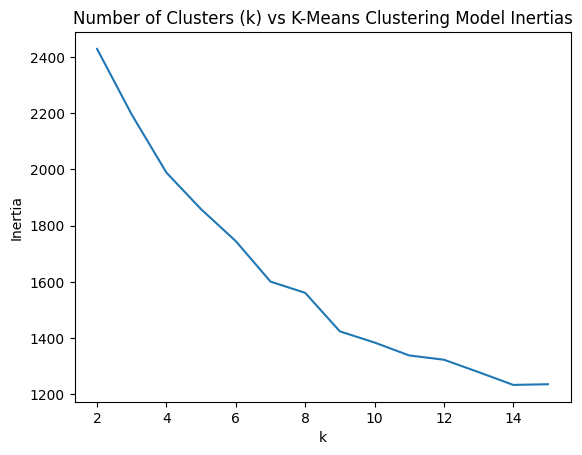

In [ ]:
plt.plot(range(min_clusters, max_clusters + 1, step), inertias)
plt.title("Number of Clusters (k) vs K-Means Clustering Model Inertias")
plt.xlabel("k")
plt.ylabel('Inertia')
plt.show()

Based on the graph, increasing the value of `k` seems to begin having diminishing returns at about `k=7`. While the graph still decreases in inertia after `k=7`, the rate at which the value decreaases is not as fast as before `k=7`. We therefore proceed to identify 7 major clusters from the dataset based on this algorithm.

In [ ]:
model = KMeans(n_clusters=7, n_init='auto')
model.fit(normalized_df)
clusters = model.predict(normalized_df)
clusters

array([3, 3, 3, 2, 3, 5, 3, 4, 3, 5, 5, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       4, 3, 6, 5, 4, 6, 5, 3, 3, 6, 5, 5, 5, 3, 5, 2, 5, 3, 0, 0, 3, 3,
       2, 4, 2, 5, 2, 0, 3, 2, 3, 2, 3, 5, 6, 2, 3, 5, 6, 5, 0, 3, 4, 5,
       3, 4, 2, 3, 3, 0, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 1, 0, 1, 2, 6,
       0, 1, 3, 3, 3, 0, 3, 5, 2, 0, 2, 3, 0, 0, 5, 0, 5, 5, 2, 3, 6, 5,
       2, 5, 2, 5, 3, 2, 5, 2, 1, 3, 0, 5, 0, 3, 3, 3, 3, 2, 3, 2, 2, 0,
       2, 4, 3, 0, 3, 1, 3, 3, 2, 1, 3, 1, 3, 2, 0, 1, 0, 4, 5, 0, 1, 0,
       3, 5, 2, 2, 2, 3, 2, 0, 4, 3, 3, 4, 1, 5, 3, 5, 2, 3, 4, 2, 3, 2,
       3, 3, 3, 4, 3, 0, 3, 3, 2, 3, 6, 2, 3, 2, 2, 3, 3, 2, 5, 3, 3, 2,
       3, 6, 3, 0, 1, 3, 2, 3, 6, 3, 0, 6, 0, 2, 3, 3, 2, 2, 5, 3, 0, 2,
       5, 2, 0, 1, 5, 3, 2, 3, 2, 2, 2, 2, 2, 2, 2, 3, 3, 2, 6, 0, 3, 3,
       3, 0, 2, 3, 2, 0, 0, 1, 2, 3, 0, 3, 3, 6, 4, 3, 3, 0, 1, 0, 4, 3,
       0, 3, 0, 3, 0, 2, 3, 2, 5, 4, 3, 4, 0, 4, 3, 3, 3, 0, 0, 2, 0, 2,
       1, 0, 3, 0, 6, 3, 3, 3, 0, 2, 0, 2, 0, 4, 2,

In [ ]:
pd.Series(clusters).value_counts()

3    117
2     70
0     50
5     33
4     20
1     18
6     16
dtype: int64

As seen above, there is some variation in the number of points in each cluster, with the most common cluster being cluster 3 and the least common being cluster 6. With the assigned clusters, we can now analyze the characteristics of the individual groups in detail.

We begin by taking a look at the centroids for each of the clusters to get a good idea of what the general characteristics of each of the clusters is.

In [ ]:
centroids_df = pd.DataFrame(model.cluster_centers_)
centroids_df = centroids_df.rename(columns=dict(zip(range(9), tracked_features)))
centroids_df

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
0,-0.285003,-0.866830,0.877217,-0.856143,-0.350460,0.144055,0.258362,-0.218598,0.063950
1,2.505874,-0.339375,-1.467726,-0.794355,0.330713,-0.563651,-0.059061,0.003417,0.545090
2,-0.158097,-0.077065,-0.502079,-0.098391,-0.142756,-0.982363,0.093200,-0.255442,-0.443165
3,-0.003473,0.634971,0.364928,0.686365,-0.350917,0.684707,-0.369731,-0.245963,-0.289804
4,-0.545440,0.185245,-0.390298,-0.093298,0.183439,0.457405,-0.295094,1.075503,2.726304
5,0.002002,0.399647,0.215639,0.134626,2.029597,0.247362,0.706483,-0.336698,0.231027
6,-0.533734,-2.271251,-1.518935,-1.180530,-0.501571,-1.607090,0.466716,2.945502,-0.639402


To help visualize the notable features of each group's centroid, a graph is provided below. To better visualize the differences between each group's centroid values, sufficiently large and small values (<-1.5 or >1.5) will be clamped to -1.5 and 1.5, respectively, for this visualization.

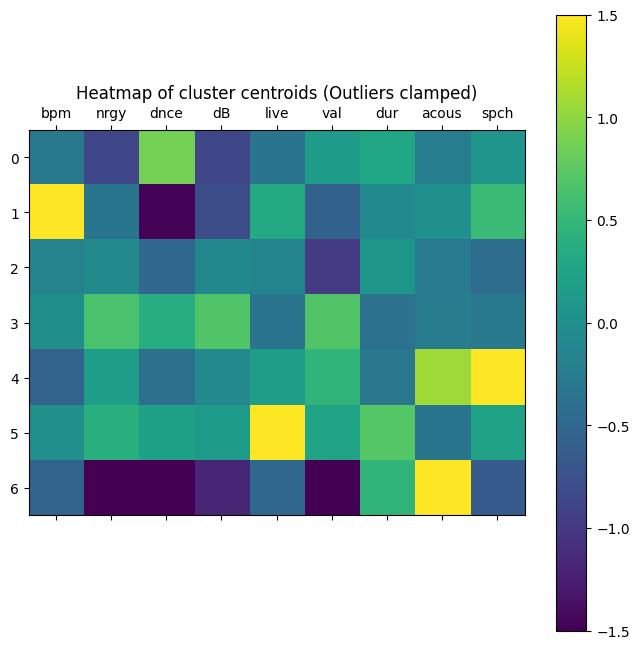

In [ ]:
_, ax = plt.subplots(figsize=(8, 8))
im = ax.matshow(centroids_df, vmin=-1.5, vmax=1.5)
plt.title('Heatmap of cluster centroids (Outliers clamped)')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8], ['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch'])
plt.colorbar(im, ax=ax)
plt.show()

For completeness, the unclamped graph (including outliers) will also be provided below.

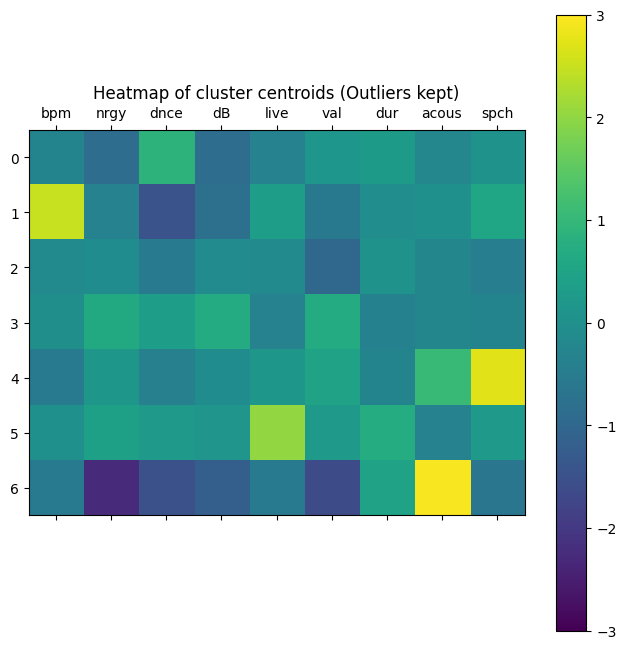

In [ ]:
_, ax = plt.subplots(figsize=(8, 8))
im = ax.matshow(centroids_df, vmin=-3.0, vmax=3.0)
plt.title('Heatmap of cluster centroids (Outliers kept)')
plt.xticks([0, 1, 2, 3, 4, 5, 6, 7, 8], ['bpm', 'nrgy', 'dnce', 'dB', 'live', 'val', 'dur', 'acous', 'spch'])
plt.colorbar(im, ax=ax)
plt.show()

Given the information from the tables and graphs, it seems like the centroids produced by the clustering algorithm are indeed distinct and may possibly map to subtypes of the dance pop genre. For example, cluster 6 has a high mean acousticness, while simultaneously having low energy and valence.

# VI. Statistical Inference




In order to validate the effectiveness of our clustering procedure, there is a need to ensure that each cluster produced by the algorithm is distinct from each other. First, to determine which methods of statistical inference to use to validate this, we need to examine the shape of the data itself. The data points were collected independently of each other, so ANOVA would be applicable here if the data is normally distributed, or follows the central limit theorem. By the central limit theorem, clusters of a large enough size (for this study, roughly $\ge30$) can be represented as a roughly normal distribution.

In [ ]:
pd.Series(clusters).value_counts()

3    117
2     70
0     50
5     33
4     20
1     18
6     16
dtype: int64

Clusters 4, 1, and 6 need to be examined for normality. We begin with cluster 4:

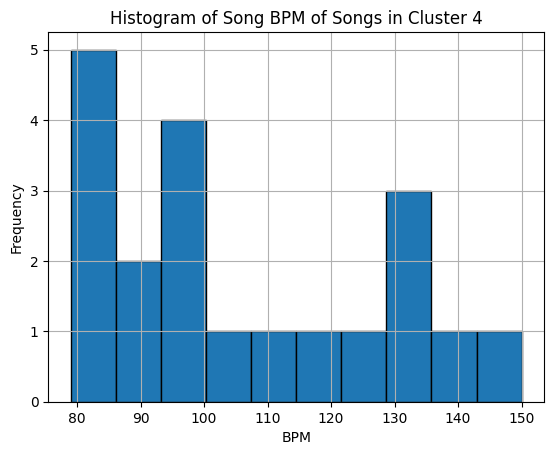

In [ ]:
dance_pop_df[clusters == 4]['bpm'].hist(edgecolor="black")
plt.title('Histogram of Song BPM of Songs in Cluster 4')
plt.xlabel('BPM')
plt.ylabel('Frequency')
plt.show()

Simply by scanning the histogram of the first feature of cluster 4, we can see that this distribution is far from a truly normal distribution. As a result, ANOVA and other traditional statistical methods for comparing means are rendered unusable. We instead use non-parametric tests of similarity that do not require the input datasets to be normally distributed.  

As a result, the Kruskal-Wallis test is used instead. The Kruskal-Wallis test is a non-parametric version of the ANOVA test, meaning that it does not require the data to be in a normal distribution to function (Smalheiser, 2017). The Kruskal-Wallis test helps determine whether there are meaningful differences in the distributions of data among multiple groups by making statistical comparisons between the data based on the data points' rank among the tested datasets. If the average ranks differ significantly, it suggests that at least one group is distinct from the others (Frost, 2023).

To apply the Kruskal-Wallis Test, it is crucial to assess and ensure the following conditions: the groups and observations being tested must be independent of one another, and there should be a minimum of three independent groups for comparison. The data does not need to be normal. The clusters being tested fulfill these conditions, since the values in the dataset were collected independently (one song being Top 1 on Spotify does not affect the others), and there are a total of 7 groups (clusters) to test on. This justifies usage of the Kruskal-Wallis Test in this case.

A special case of the Kruskal-Wallis test can be applied if the variances of the groups are about the same. The variances per feature are shown below.

In [ ]:
pd.DataFrame([
    cluster.agg('var')
    for cluster in (normalized_df[clusters == i] for i in range(len(centroids_df)))
])

,bpm,nrgy,dnce,dB,live,val,dur,acous,spch
0,0.439960,0.437401,0.377550,0.707238,0.403835,0.814830,0.847761,0.280514,0.692036
1,0.563355,1.165449,0.949316,2.092926,0.561123,1.039316,0.848345,0.381199,2.225023
2,0.627262,0.470168,0.403351,0.530907,0.530206,0.209299,1.011201,0.353567,0.097449
3,0.449782,0.395077,0.432488,0.404468,0.378998,0.399277,0.524304,0.377826,0.197293
4,0.871929,0.618150,1.010698,0.656754,0.882968,0.464504,0.668252,1.317285,0.964877
5,0.556853,0.346178,0.560165,0.714290,0.994491,0.505694,2.160421,0.183896,0.557840
6,2.244889,0.395717,1.483939,0.533696,0.063134,0.263396,0.927689,1.660752,0.025815


In the case where the variances of the groups are about the same, the Kruskal-Wallis test can be used to make inferences about the medians of the clusters. As this is not the case for our dataset, as shown in the results above, the Kruskal-Wallis test makes inferences based on the average rank of the cluster instead. Nevertheless, a significant p-value obtained through this test indicates a significant difference between at least two clusters in the dataset.

The null and alternative hypotheses for the Kruskal-Wallis test are as follows:

For each tracked feature in the dataset (namely: BPM, energy, danceability, loudness, liveness, valence, duration, and speechiness):

$H_0$ (Null Hypothesis): There is no difference in the average rank of that feature between each of the clusters.

$H_A$ (Alternative Hypothesis): There is a significant difference in the average rank of that feature in at least one pair of clusters.

This test is conducted at a significance level $\alpha = 0.05$, for a confidence level of **95%**.

In [ ]:
cluster_data_points = {}

for feat in tracked_features:
  cluster_data_points[feat] = [
      normalized_df[feat][clusters == i] for i in range(len(centroids_df))
  ]

cluster_data_points

{'bpm': [22     0.511470
  71    -1.049367
  72    -1.093963
  81     0.511470
  98     0.154707
  116   -0.648009
  143   -1.049367
  151    0.065517
  163    0.422280
  169   -1.049367
  172   -0.737200
  173    0.422280
  178    0.511470
  203    0.422280
  205   -0.514223
  232   -0.826391
  238   -1.004772
  257    0.511470
  263    0.511470
  274   -0.157460
  284   -0.202056
  297    0.110112
  330    1.626354
  366   -0.425032
  377   -0.603414
  382   -0.737200
  393    0.065517
  398   -0.335842
  425    0.199303
  432   -1.272344
  438    0.110112
  439    0.199303
  457   -0.023674
  468    0.065517
  475   -0.826391
  482   -0.558818
  485   -0.558818
  490   -1.450726
  502   -0.603414
  510   -0.603414
  512   -0.112865
  515   -0.960177
  519   -0.826391
  524    1.135805
  534   -0.692605
  540    0.110112
  542   -0.960177
  563   -0.960177
  566    0.065517
  593   -1.138558
  Name: bpm, dtype: float64,
  128    1.849331
  140    1.849331
  145    2.741238
  152    2

In [ ]:
kruskal_pvalues = pd.DataFrame([
    (
        feat,
        kruskal(*cluster_data_points[feat], nan_policy='raise').pvalue
    ) for feat in tracked_features
])

kruskal_pvalues = kruskal_pvalues.rename(columns={0: 'feature', 1: 'p-value'})
kruskal_pvalues

,feature,p-value
0,bpm,2.299211e-11
1,nrgy,4.953619e-29
2,dnce,2.976699e-29
3,dB,1.452315e-25
4,live,6.254807e-19
5,val,1.178561e-34
6,dur,4.829222e-07
7,acous,8.135372e-14
8,spch,2.308720e-20


The P-values per feature are as follows:   \\
BPM: $2.30 \times 10^{-11}$  \\
Energy: $4.95 \times 10^{-29}$  \\
Danceability: $2.98 \times 10^{-29}$  \\
Loudness: $1.45 \times 10^{-25}$  \\
Liveness: $6.25 \times 10^{-19}$  \\
Valence: $1.17 \times 10^{-34}$  \\
Duration: $4.83 \times 10^{-7}$  \\
Acousticness: $8.14 \times 10^{-14}$  \\
Speechiness: $2.31 \times 10^{-20}$  \\


As seen by the p-values generated by the test, there is enough evidence to conclude that, for each feature generated, there is at least one pair that has significantly different average ranks, as all of them are below the necessary threshold value of $0.05$. To identify which of these pairs are significantly different, we can conduct a Dunn post-hoc test to better look into the differences between the clusters.

The Dunn post-hoc test is a statistical test that is typically done after a rejected null hypothesis result for the Kruskal-Wallis test, and allows the researchers to determine which pairs of groups are significantly different. This test is applicable to use since we rejected the null hypothesis for all features in the Kruskal-Wallis test, and since the test also compares by average ranks in a similar manner to Kruskal-Wallis (Elliot & Hynan, 2011).

Additionally, the Bonferroni correction will be applied to help correct for the probability of a Type I error. The Bonferroni correction is a method of adjusting the alpha value necessary to reject the null hypothesis to correct for the increased probability of type I errors when conducting multiple tests at once (Napierala, 2012). This helps prevent false positives in the Dunn test output.

Given two clusters A and B being compared on a given feature, the null and alternative hypotheses for the Dunn post-hoc test are the following:

$H_0$ (Null Hypothesis): There is no difference in the average rank of that feature between clusters A and B.

$H_A$ (Alternative Hypothesis): There is a significant difference in the average rank of that feature between clusters A and B.

This test is conducted at a significance level $\alpha = 0.05$, for a confidence level of **95%**.

In [ ]:
dunn_pvalues = {
    feat: posthoc_dunn(cluster_data_points[feat], p_adjust='bonferroni')
    for feat in tracked_features
}
dunn_pvalues

{'bpm':               1             2             3             4             5  \
 1  1.000000e+00  3.234293e-11  1.000000e+00  6.031482e-01  1.000000e+00   
 2  3.234293e-11  1.000000e+00  1.712597e-09  1.064910e-08  9.409373e-10   
 3  1.000000e+00  1.712597e-09  1.000000e+00  1.000000e+00  1.000000e+00   
 4  6.031482e-01  1.064910e-08  1.000000e+00  1.000000e+00  4.052729e-01   
 5  1.000000e+00  9.409373e-10  1.000000e+00  4.052729e-01  1.000000e+00   
 6  7.978574e-01  9.533329e-06  1.000000e+00  1.000000e+00  4.094423e-01   
 7  1.000000e+00  2.010838e-07  1.000000e+00  1.000000e+00  1.000000e+00   
 
           6             7  
 1  0.797857  1.000000e+00  
 2  0.000010  2.010838e-07  
 3  1.000000  1.000000e+00  
 4  1.000000  1.000000e+00  
 5  0.409442  1.000000e+00  
 6  1.000000  1.000000e+00  
 7  1.000000  1.000000e+00  ,
 'nrgy':               1         2             3             4         5             6  \
 1  1.000000e+00  0.518542  7.711554e-04  2.896338e-20  0.00

To better visualize the results of the Dunn test given the P-Values above, we transform the results based on whether or not they provide enough evidence to show they are different `p <= 0.05`. Specifically, p-values less than or equal to `0.05` reject the null hypothesis and are set to a value of `1`, while p-values greater than `0.05` and accept the null hypothesis are set to `0`.  

(Implementation detail: P-values displayed above have already been transformed such that they are valid at the original alpha value of `0.05` based on the Bonferroni correction. As a result, there is no need to adjust the alpha value for acceptance or rejection of the null hypotheses.)

In [ ]:
filtered_dunn_pvalues = {
    feat: data.copy()
    for feat, data in dunn_pvalues.items()
}

for feat, data in filtered_dunn_pvalues.items():
  filtered_dunn_pvalues[feat] = (filtered_dunn_pvalues[feat] <= 0.05).astype(int)

filtered_dunn_pvalues

{'bpm':    1  2  3  4  5  6  7
 1  0  1  0  0  0  0  0
 2  1  0  1  1  1  1  1
 3  0  1  0  0  0  0  0
 4  0  1  0  0  0  0  0
 5  0  1  0  0  0  0  0
 6  0  1  0  0  0  0  0
 7  0  1  0  0  0  0  0,
 'nrgy':    1  2  3  4  5  6  7
 1  0  0  1  1  1  1  0
 2  0  0  0  1  0  0  1
 3  1  0  0  1  0  0  1
 4  1  1  1  0  0  0  1
 5  1  0  0  0  0  0  1
 6  1  0  0  0  0  0  1
 7  0  1  1  1  1  1  0,
 'dnce':    1  2  3  4  5  6  7
 1  0  1  1  1  1  1  1
 2  1  0  0  1  0  1  0
 3  1  0  0  1  0  1  0
 4  1  1  1  0  0  0  1
 5  1  0  0  0  0  0  0
 6  1  1  1  0  0  0  1
 7  1  0  0  1  0  1  0,
 'dB':    1  2  3  4  5  6  7
 1  0  0  1  1  0  1  0
 2  0  0  0  1  0  0  0
 3  1  0  0  1  0  0  1
 4  1  1  1  0  1  0  1
 5  0  0  0  1  0  0  1
 6  1  0  0  0  0  0  1
 7  0  0  1  1  1  1  0,
 'live':    1  2  3  4  5  6  7
 1  0  1  0  0  0  1  0
 2  1  0  0  1  0  1  0
 3  0  0  0  0  0  1  0
 4  0  1  0  0  0  1  0
 5  0  0  0  0  0  1  0
 6  1  1  1  1  1  0  1
 7  0  0  0  0  0  1  0

Plots of these results are provided below for clarity. Yellow tiles indicate a difference in the clusters for that particular feature, while purple tiles indicate no significant difference.

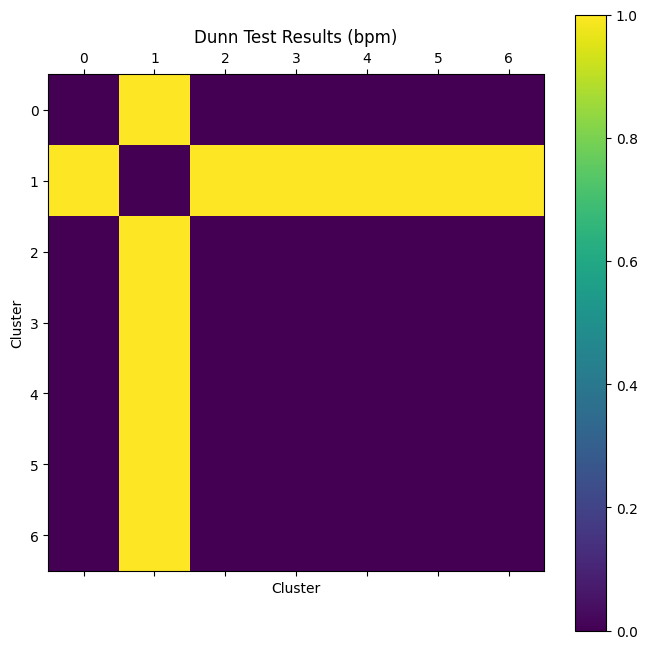

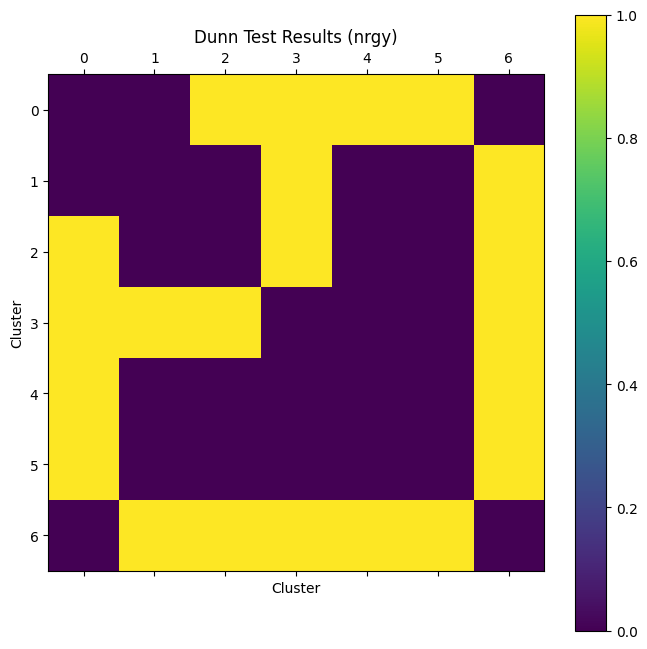

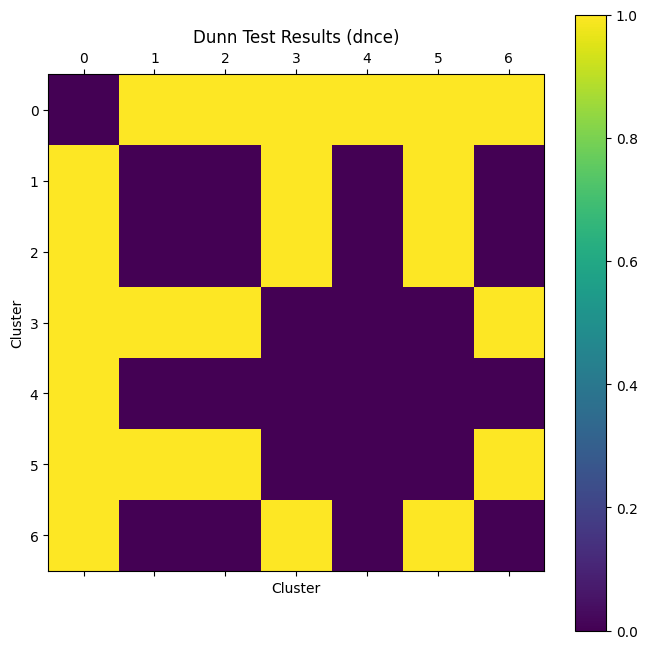

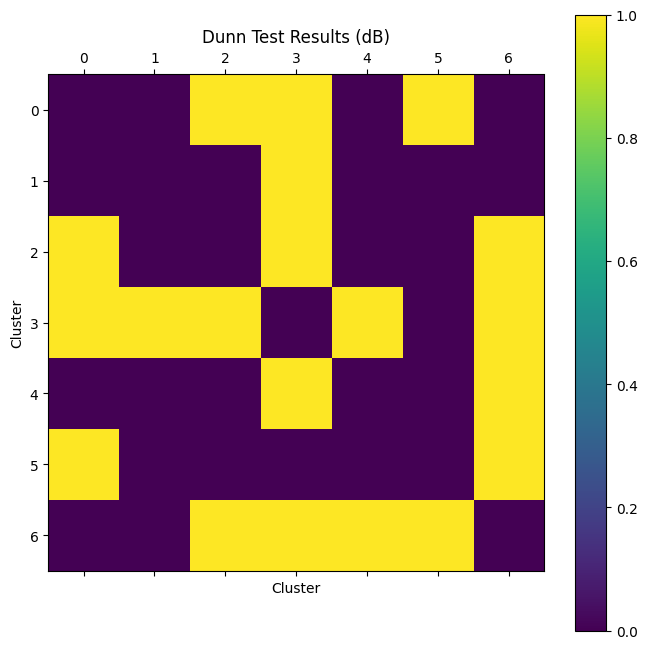

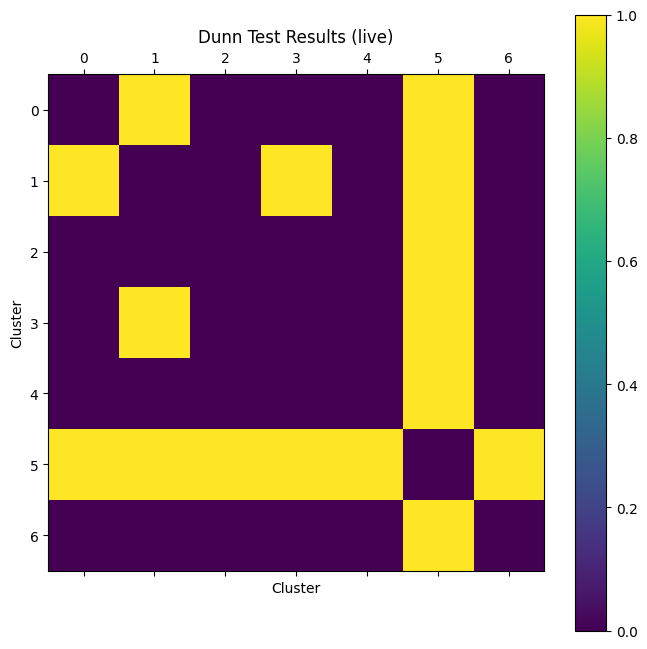

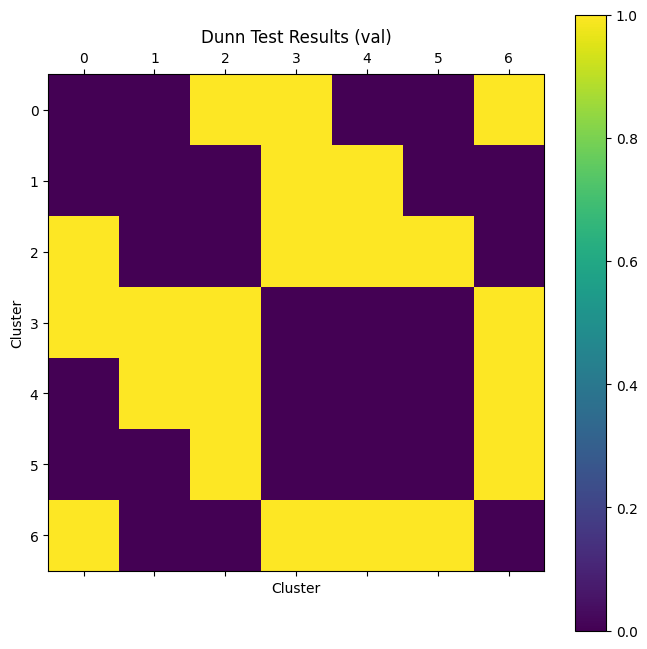

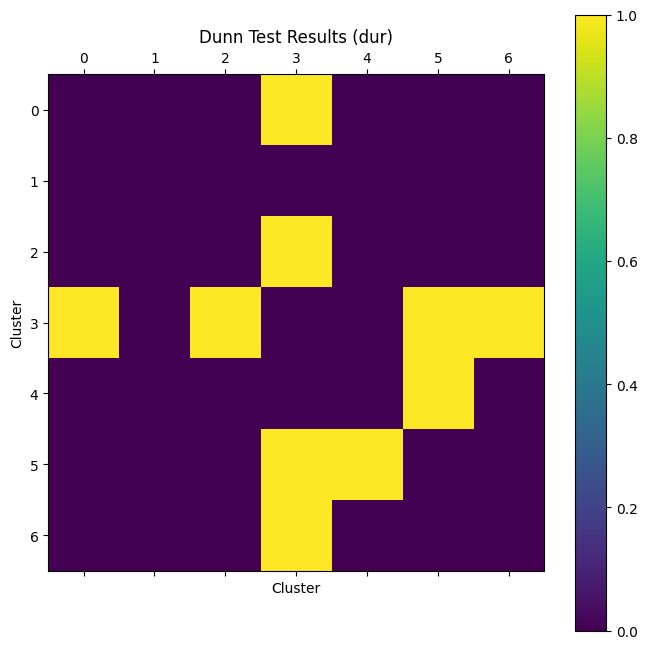

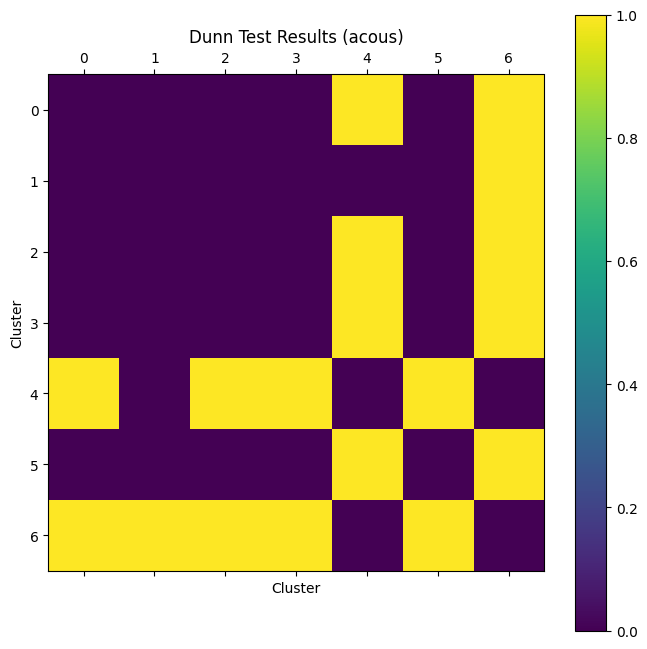

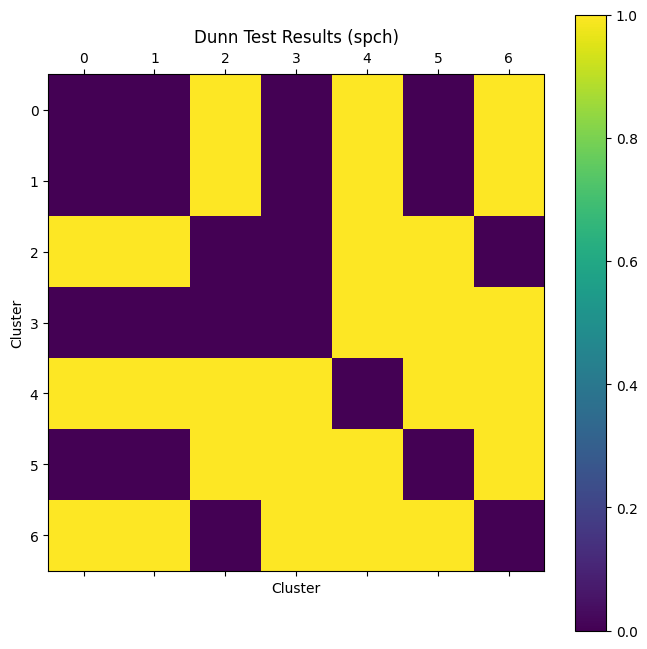

In [ ]:
for feat, data in filtered_dunn_pvalues.items():
  _, ax = plt.subplots(figsize=(8, 8))
  im = ax.matshow(data, vmin=0.0, vmax=1.0)
  plt.title(f'Dunn Test Results ({feat})')
  plt.xlabel('Cluster')
  plt.ylabel('Cluster')
  plt.colorbar(im, ax=ax)
  plt.show()

We can `OR` the values of all the Dunn test results together to create a table whose value is 1 if the two clusters being compared are significantly different in at least one feature from its paired cluster, and 0 if not.

In [ ]:
filtered_dunn_pvalues_aggregated = filtered_dunn_pvalues['dur']
for feat, data in filtered_dunn_pvalues.items():
  if feat != 'dur':
    filtered_dunn_pvalues_aggregated = filtered_dunn_pvalues_aggregated | data

filtered_dunn_pvalues_aggregated

,1,2,3,4,5,6,7
1,0,1,1,1,1,1,1
2,1,0,1,1,1,1,1
3,1,1,0,1,1,1,1
4,1,1,1,0,1,1,1
5,1,1,1,1,0,1,1
6,1,1,1,1,1,0,1
7,1,1,1,1,1,1,0


Based on the results, we can see that every pair of clusters (except pairs consisting of the same cluster twice) differ in at least one feature to every other cluster. This result suggests that the clusters generated by the k-means algorithm are truly distinct.

# VII. Insights and Conclusions

##A. Preliminary Observations
During the Exploratory Data Analysis stage where the researchers were familiarizing themselves with the data being handled, several facts became known.

The top 5 artists that appear the most are `Katy Perry`, `Justin Bieber`, `Rihanna`, `Maroon 5`, and `Lady Gaga`. Basing upon the `popularity` variable, the most popular artists of the decade are `Lewis Capaldi`, `SHAED`, `Lizzo`, `Mabel`, `Marshmello`, and `Jonas Brothers`. There is no correlation between the frequency and popularity of an artist.

The most frequently occuring genres (that appear more than 10 times) are `dance pop`, `pop`, `canadian pop`, `barbadian pop`, `boy band`, `electropop`, and `british soul`. When looking at the average of the `popularity` variable of each genre, `escape room`, `brostep`, `alternative r&b`, `irish singer-songwriter`, and `edm` are the most successful. The frequency and the popularity of the genres are not significantly correlated.

When observing the relationship between different variables of dance pop songs, there were some pairings that show moderate positive correlation (loudness and energy, valence and danceability) and moderate negative correlation (acousticness and energy). The relationships between different variables of non-dance pop songs were also checked. The correlations of the variables of dance pop and the correlations of the variables of non-dance pop songs were found to be similar. Furthermore, comparing the danceability of dance pop songs and non-dance pop songs, there is a significant difference. In addition, there is a significant difference between the popularity of dance pop songs and the rest of the songs.

The most common bpms seem to lie around the middle of the dataset, between `120-129`, `90-99`, `110-119`, `100-109`, and `130-139`. The most popular songs (based on popularity) from this decade have BPMs of: `170-179`, `150-159`, `90-99`, `60-69`, and `130-139`. There is evidence to say that there is no correlation between the frequency and popularity of bpm. Finally, the average bpm of a genre is not correlated with its popularity.


##B. Further Observations

The dance pop genre has dominated the top Spotify songs from 2010 to 2019, encompassing over half of the listed songs. Because of this, it raised a question on whether the dance pop genre can be further subclassified based on different factors like its tempo, energy, danceability, etc. To answer this question, various statistical tests and clustering methods were applied to the data of the top Spotify songs in the past decade.

It was concluded that the dance pop genre can be further subclassified into different genres based on their danceability, bpm, energy, etc. Through a normalization process and subsequent clustering, the genre was effectively divided into seven distinct clusters, identified as the optimal k value. Based on the results obtained from the Kruskal-Wallis and Dunn tests, it is possible to conclude that each cluster exhibited some unique characteristics, resulting in the identification of distinct subgroups. With the use of the Kruskal-Wallis test along with the Dunn post-hoc test, it was determined that each cluster is significantly different from every other cluster in at least one characteristic ($p < 0.05$).

These findings show that not only are there ways to categorize tracks of the most popular music beyond the simple label of genre as a classification metric in a way that produces distinct subgenres under dance pop as a whole, but also that it can be done automatically and be based on mathematical, computed statistics. It then follows that it is possible to analyze the properties of these clusters to figure out answers to practical questions, such as which subclassification of dance pop music would remain popular for a long period of time, which clusters' popularity increased or decreased as the decade went by. The results of potential future analyses based on algorithmically assigned clusters under existing genres can help reveal patterns or trends that are not directly visible to the human eye, with the advantage that manual subcategorization of this still highly relevant genre of music would not be needed. Ultimately, the ability to contribute towards answering these questions is facilitated by the existence of distinct clusters with notable high and low features that can be studied and analyzed in further depth.

In conclusion, the study contributes to the understanding of the trends of the musical preferences of Spotify listeners as well as the evolution and variation of the dance pop genre specifically. The study also demonstrates the usefulness and applicability of statistical and clustering techniques in music analysis that may be useful for future studies.

#VIII. References

Ashish. (2022, January 17). *What is a decibel and how can negative decibels exist?*. Science ABC. `https://www.scienceabc.com/pure-sciences/why-negative-decibels-are-a-thing.html`

Aucouturier, J. J., & Pachet, F. (2003). Representing musical genre: A state of the art. Journal of new music research, 32(1), 83-93.

Elliott, A. C., & Hynan, L. S. (2011). A SAS® macro implementation of a multiple comparison post hoc test for a Kruskal–Wallis analysis. Computer methods and programs in biomedicine, 102(1), 75-80.

Frost, J. (2023, July 31). Kruskal Wallis Test explained. Statistics by Jim. `https://statisticsbyjim.com/hypothesis-testing/kruskal-wallis-test/`

Henrique, L. (2017). *Top Spotify songs from 2010-2019 - BY YEAR.* `https://www.kaggle.com/datasets/leonardopena/top-spotify-songs-from-20102019-by-year`

Li, T., & Ogihara, M. (2005, March). Music genre classification with taxonomy. In Proceedings.(ICASSP'05). IEEE International Conference on Acoustics, Speech, and Signal Processing, 2005. (Vol. 5, pp. v-197). IEEE.

Napierala, M. A. (2012). What is the Bonferroni correction?. Aaos Now, 40-41.

Organize Your Music. (n.d.). *Organize your music*. `http://organizeyourmusic.playlistmachinery.com/`

Pro Musician Hub. (n.d.). *What Is BPM in music? Definition, meaning & how to calculate it*. `https://promusicianhub.com/what-is-bpm-music/`

Schedl, M., Knees, P., & Gouyon, F. (2017, August). New paths in music recommender systems research. In *Proceedings of the Eleventh ACM Conference on Recommender Systems* (pp. 392-393).

Smalheiser, N. (2017). *Data literacy: How to make your experiments robust and reproducible.* Academic Press.

Spotify. (n.d.). *Spotify Web API documentation: Get track's audio features.* `https://developer.spotify.com/documentation/web-api/reference/get-audio-features`

